In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

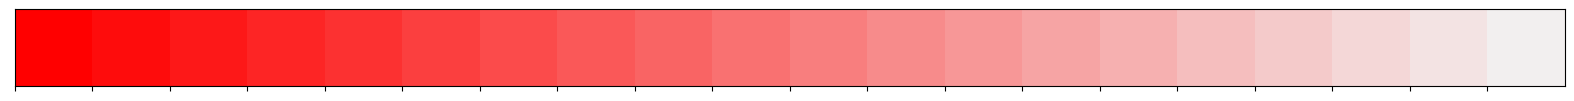

In [2]:
# задание палитры цветов
color_palette = sns.light_palette('red', n_colors=20, reverse=True)
sns.palplot(color_palette)
plt.show()

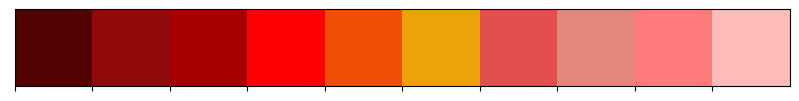

In [3]:
# задание палитры цветов
colors = ['#520202', '#910a0a', '#a70000', '#ff0000', '#f24d07', '#eba307', '#e34f4f', '#e3887b', '#ff7b7b', '#ffbaba']
sns.palplot(sns.color_palette(colors))

In [4]:
import matplotlib.colors as mcolors


def make_colormap(seq):
    
    """ функция создания пользовательского
            масштабируемого цвета """
    
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [5]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('darkred'), c('brown'), 0.20, c('brown'), c('red'), 0.40, c('red'), \
                     c('indianred'), 0.60, c('indianred'), c('lightcoral'), 0.80, c('lightcoral')])

In [6]:
# вывод пользовательской палитры
rvb

In [7]:
# считывание данных с геоданными Московской агломерации
adm = pd.read_csv('data_clean/adm.csv')

In [8]:
# вывод данных
adm.head()

geometry  cell_zid  \
0  MULTIPOLYGON (((38.6495389842383 54.2597139180...         0   
1  MULTIPOLYGON (((38.6549362377517 54.2572466621...         1   
2  MULTIPOLYGON (((38.6625773861122 54.2560891872...         2   
3  MULTIPOLYGON (((38.670279125503 54.25708620909...         3   
4  MULTIPOLYGON (((38.6779821287111 54.2581143832...         4   

           adm_name        okrug_name             sub_ter  area  conts_zid  
0  Серебряные пруды  Серебряные пруды  Московская область  0.25          1  
1  Серебряные пруды  Серебряные пруды  Московская область  0.25          1  
2  Серебряные пруды  Серебряные пруды  Московская область  0.25          1  
3  Серебряные пруды  Серебряные пруды  Московская область  0.25          1  
4  Серебряные пруды  Серебряные пруды  Московская область  0.25          1

### Анализ изменения плотности населения по секторам Московской агломерации

In [9]:
# считывание данных по изменению плотности населения
cdensity = pd.read_csv('data/02_CDensity_202109.csv')

In [10]:
# вывод данных
cdensity.head()

dt  time_interval    zid  median_customers_cnt_total  \
0  2021-09-01              1  32909                         1.0   
1  2021-09-01              1  32910                         1.0   
2  2021-09-01              1  33261                         2.0   
3  2021-09-01              1  33262                         3.0   
4  2021-09-01              1  33264                         1.0   

   median_customers_cnt_long  median_customers_cnt_work  \
0                        1.0                        0.0   
1                        1.0                        0.0   
2                        2.0                        0.0   
3                        3.0                        0.0   
4                        1.0                        0.0   

   median_customers_cnt_loc  median_customers_cnt_long_work  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   median_customers_cnt_long_loc  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0

In [11]:
# проверка на наличие пропусков
cdensity.isna().sum()

dt                                0
time_interval                     0
zid                               0
median_customers_cnt_total        0
median_customers_cnt_long         0
median_customers_cnt_work         0
median_customers_cnt_loc          0
median_customers_cnt_long_work    0
median_customers_cnt_long_loc     0
dtype: int64

In [12]:
# тип данных
cdensity.dtypes

dt                                 object
time_interval                       int64
zid                                 int64
median_customers_cnt_total        float64
median_customers_cnt_long         float64
median_customers_cnt_work         float64
median_customers_cnt_loc          float64
median_customers_cnt_long_work    float64
median_customers_cnt_long_loc     float64
dtype: object

In [13]:
# признаки данных
cdensity.columns

Index(['dt', 'time_interval', 'zid', 'median_customers_cnt_total',
       'median_customers_cnt_long', 'median_customers_cnt_work',
       'median_customers_cnt_loc', 'median_customers_cnt_long_work',
       'median_customers_cnt_long_loc'],
      dtype='object')

In [14]:
'median_customers_cnt_total'.replace('median_customers_', '')

'cnt_total'

In [15]:
# переименование признаков
cdensity.columns = [column.replace('median_customers_', '') for column in cdensity.columns]

In [16]:
# проверка изменений
cdensity.columns

Index(['dt', 'time_interval', 'zid', 'cnt_total', 'cnt_long', 'cnt_work',
       'cnt_loc', 'cnt_long_work', 'cnt_long_loc'],
      dtype='object')

In [17]:
# показатели изменения плотности населения Московской агломерации
indicators = cdensity.columns[3:]

In [18]:
# смена типа данных
cdensity['dt'] = pd.to_datetime(cdensity['dt'])

In [19]:
# период сбора данных по изменению плотности населения
cdensity['dt'].agg(['min', 'max'])

min   2021-09-01
max   2021-09-30
Name: dt, dtype: datetime64[ns]

Данные по изменению плотности населения Московской агломерации собраны за период **с 01 по 30 сентября 2021 г.**

In [20]:
# вывод данных
cdensity.head()

dt  time_interval    zid  cnt_total  cnt_long  cnt_work  cnt_loc  \
0 2021-09-01              1  32909        1.0       1.0       0.0      0.0   
1 2021-09-01              1  32910        1.0       1.0       0.0      0.0   
2 2021-09-01              1  33261        2.0       2.0       0.0      0.0   
3 2021-09-01              1  33262        3.0       3.0       0.0      0.0   
4 2021-09-01              1  33264        1.0       1.0       0.0      0.0   

   cnt_long_work  cnt_long_loc  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0  
3            0.0           0.0  
4            0.0           0.0

In [21]:
# интервалы сбора данных
cdensity['time_interval'].unique()

array([1, 2, 3, 4], dtype=int64)

In [22]:
# данные кодировки интервалов
time_interval = {1 : '0-6', 2 : '6-12', 3 : '12-18', 4 : '18-24'}

In [23]:
# применение кодировки интервалов
cdensity['time_interval'] = cdensity['time_interval'].map(time_interval)

In [24]:
# размерность данных
cdensity.shape

(1224897, 9)

In [25]:
# считывание данных по изменению численности населения
clocation = pd.read_csv('data/01_Clocation_202109.csv')

In [26]:
# количество секторов по изменению численности населения
clocation['zid'].nunique(), clocation['zid'].size

(10169, 10169)

In [27]:
# проверка соответствия секторов по сбору данных
len(set(cdensity['zid']) & set(clocation['zid']))

10169

In [28]:
# проверка соответствия секторов по сбору данных
set(cdensity['zid']) == set(clocation['zid'])

False

In [29]:
# проверка соответствия секторов по сбору данных
len(set(cdensity['zid']) - set(clocation['zid']))

80

В данных изменения плотности численности населения присутствуют данные по секторам, которых не было в данных изменения численности населения

In [30]:
# размерность DataFrame до объединения
cdensity.shape

(1224897, 9)

In [31]:
# объединение данных изменения плотности населения с данными административных районов Московской агломерации
cdensity = cdensity.merge(adm, left_on='zid', right_on='cell_zid')

In [32]:
# размерность DataFrame после объединения
cdensity.shape

(1670315, 16)

Размерность данных изменилась. Ранее при анализе геоданных Московской агломерации было установлено, что в отдельные сектора попадают границы нескольких административных районов. При этом площадь административных районов не всегда пропорциональна друг другу. В результате чего при объединении данных происходит искажение изменения плотности населения.

In [33]:
# удаление признака разбиения сектора
cdensity.drop(columns='zid', inplace=True)

In [34]:
# вывод данных
cdensity.head()

dt time_interval  cnt_total  cnt_long  cnt_work  cnt_loc  \
0 2021-09-01           0-6        1.0       1.0       0.0      0.0   
1 2021-09-01          6-12        2.0       0.0       0.0      0.0   
2 2021-09-01         12-18        1.0       1.0       0.0      0.0   
3 2021-09-01         18-24        1.0       0.0       0.0      0.0   
4 2021-09-02           0-6        1.0       1.0       0.0      0.0   

   cnt_long_work  cnt_long_loc  \
0            0.0           0.0   
1            0.0           0.0   
2            0.0           0.0   
3            0.0           0.0   
4            0.0           0.0   

                                            geometry  cell_zid   adm_name  \
0  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
1  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
2  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
3  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
4  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   

                        okrug_name       sub_ter  area  conts_zid  
0  Троицкий административный округ  Новая Москва  0.25          1  
1  Троицкий административный округ  Новая Москва  0.25          1  
2  Троицкий административный округ  Новая Москва  0.25          1  
3  Троицкий административный округ  Новая Москва  0.25          1  
4  Троицкий административный округ  Новая Москва  0.25          1

In [35]:
# максимальное количество наложение границ административных районов в секторе
cdensity['conts_zid'].max()

5

### Анализ изменения плотности населения одного из округа

In [36]:
# выборка данных по выбранному округу
troitsky_okrug = cdensity[cdensity['okrug_name'] == 'Троицкий административный округ']

In [37]:
# вывод данных
troitsky_okrug.head()

dt time_interval  cnt_total  cnt_long  cnt_work  cnt_loc  \
0 2021-09-01           0-6        1.0       1.0       0.0      0.0   
1 2021-09-01          6-12        2.0       0.0       0.0      0.0   
2 2021-09-01         12-18        1.0       1.0       0.0      0.0   
3 2021-09-01         18-24        1.0       0.0       0.0      0.0   
4 2021-09-02           0-6        1.0       1.0       0.0      0.0   

   cnt_long_work  cnt_long_loc  \
0            0.0           0.0   
1            0.0           0.0   
2            0.0           0.0   
3            0.0           0.0   
4            0.0           0.0   

                                            geometry  cell_zid   adm_name  \
0  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
1  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
2  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
3  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   
4  MULTIPOLYGON (((37.0381820225216 55.1447963241...     32909  Роговское   

                        okrug_name       sub_ter  area  conts_zid  
0  Троицкий административный округ  Новая Москва  0.25          1  
1  Троицкий административный округ  Новая Москва  0.25          1  
2  Троицкий административный округ  Новая Москва  0.25          1  
3  Троицкий административный округ  Новая Москва  0.25          1  
4  Троицкий административный округ  Новая Москва  0.25          1

In [38]:
# пересчет показателей изменения плотности населения с учетом пересечения секторов
troitsky_okrug = troitsky_okrug[indicators].apply(lambda x: x / troitsky_okrug['conts_zid']) \
                 .merge(troitsky_okrug.drop(columns=indicators), left_index=True, right_index=True)
troitsky_okrug.head()

cnt_total  cnt_long  cnt_work  cnt_loc  cnt_long_work  cnt_long_loc  \
0        1.0       1.0       0.0      0.0            0.0           0.0   
1        2.0       0.0       0.0      0.0            0.0           0.0   
2        1.0       1.0       0.0      0.0            0.0           0.0   
3        1.0       0.0       0.0      0.0            0.0           0.0   
4        1.0       1.0       0.0      0.0            0.0           0.0   

          dt time_interval                                           geometry  \
0 2021-09-01           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
1 2021-09-01          6-12  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
2 2021-09-01         12-18  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
3 2021-09-01         18-24  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
4 2021-09-02           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   

   cell_zid   adm_name                       okrug_name       sub_ter  area  \
0     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
1     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
2     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
3     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
4     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   

   conts_zid  
0          1  
1          1  
2          1  
3          1  
4          1

In [39]:
# корреляция признаков изменения плотности населения в Троицком административном округе
troitsky_okrug_corr = troitsky_okrug.iloc[:,:6].corr()
troitsky_okrug_corr

cnt_total  cnt_long  cnt_work   cnt_loc  cnt_long_work  \
cnt_total       1.000000  0.989359  0.870544  0.928979       0.883617   
cnt_long        0.989359  1.000000  0.838989  0.953931       0.867663   
cnt_work        0.870544  0.838989  1.000000  0.762049       0.986366   
cnt_loc         0.928979  0.953931  0.762049  1.000000       0.792640   
cnt_long_work   0.883617  0.867663  0.986366  0.792640       1.000000   
cnt_long_loc    0.913054  0.946447  0.737215  0.996769       0.773759   

               cnt_long_loc  
cnt_total          0.913054  
cnt_long           0.946447  
cnt_work           0.737215  
cnt_loc            0.996769  
cnt_long_work      0.773759  
cnt_long_loc       1.000000

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\3553736194.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(troitsky_okrug_corr, dtype=np.bool))


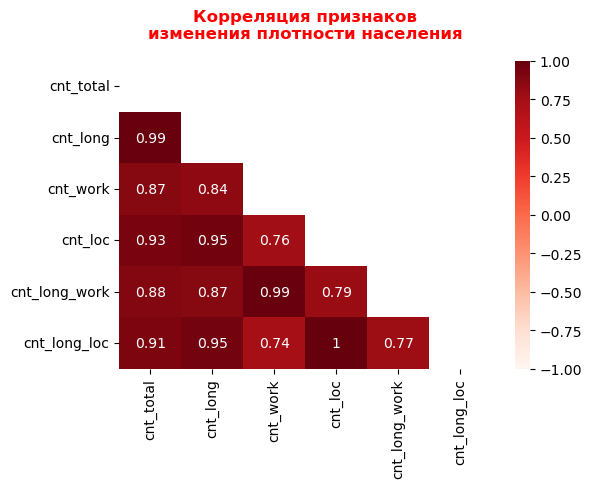

In [40]:
# визуализация корреляции признаков изменения численности населения в Троицком административном округе
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(troitsky_okrug_corr, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(troitsky_okrug_corr, mask=mask, vmin=-1, vmax=1, \
                                     annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nизменения плотности населения', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16);

In [41]:
# признаки данных
troitsky_okrug.columns

Index(['cnt_total', 'cnt_long', 'cnt_work', 'cnt_loc', 'cnt_long_work',
       'cnt_long_loc', 'dt', 'time_interval', 'geometry', 'cell_zid',
       'adm_name', 'okrug_name', 'sub_ter', 'area', 'conts_zid'],
      dtype='object')

In [42]:
# подсчет сумарного изменения числености плотности по дням в разрезе соответствующего административного района
troitsky_okrug_dt = troitsky_okrug.groupby(['adm_name', 'dt'])[indicators].sum()
troitsky_okrug_dt.head()

cnt_total      cnt_long     cnt_work  \
adm_name    dt                                                     
Вороновское 2021-09-01   94335.291667  73962.125000  5793.750000   
            2021-09-02   94238.375000  73962.125000  6076.166667   
            2021-09-03   97682.166667  75332.958333  5823.583333   
            2021-09-04  108808.583333  85224.791667  4348.833333   
            2021-09-05  109184.375000  85872.541667  4288.000000   

                             cnt_loc  cnt_long_work  cnt_long_loc  
adm_name    dt                                                     
Вороновское 2021-09-01  17910.208333    4420.833333  15452.333333  
            2021-09-02  17933.666667    4660.750000  15561.666667  
            2021-09-03  17939.583333    4426.666667  15516.666667  
            2021-09-04  19397.750000    3464.500000  16961.166667  
            2021-09-05  19941.416667    3473.250000  17575.583333

In [43]:
indicators

Index(['cnt_total', 'cnt_long', 'cnt_work', 'cnt_loc', 'cnt_long_work',
       'cnt_long_loc'],
      dtype='object')

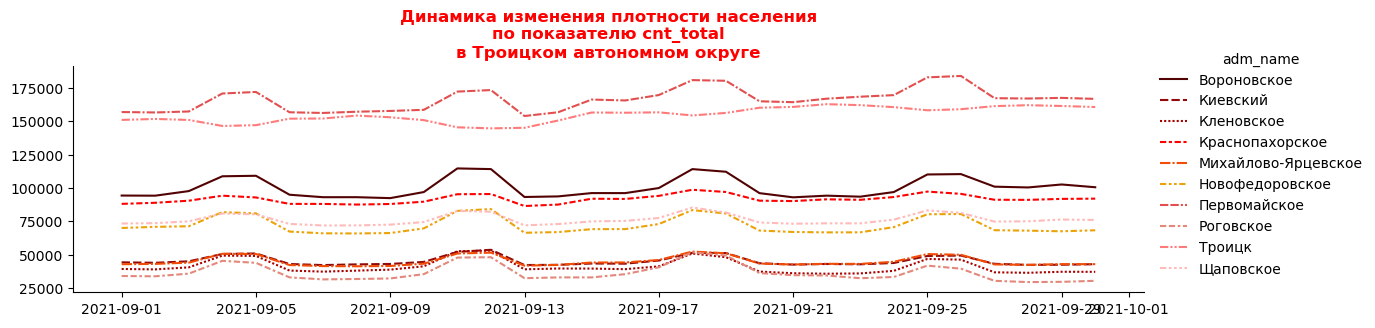

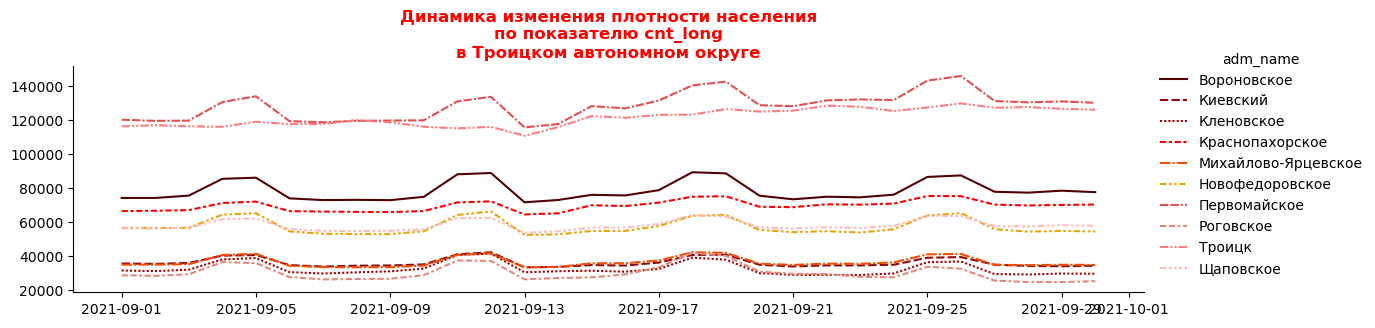

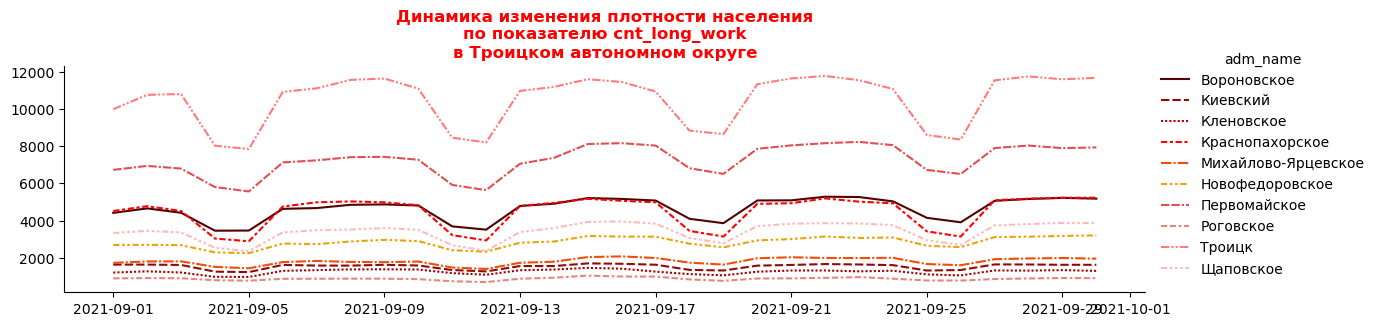

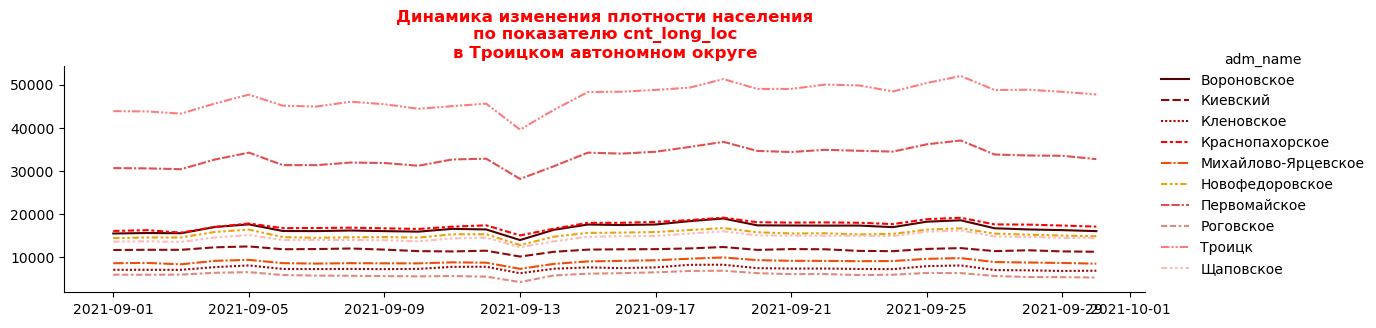

In [44]:
# визуализация изменения плотности населения по дням в по соответствующим районам округа
for indicator in indicators:
    sns.relplot(x = 'dt', y = indicator, hue= 'adm_name', height=3, aspect=4,\
            palette=sns.color_palette(colors), style="adm_name", data = troitsky_okrug_dt, kind="line")
    plt.xticks(rotation=0, ha="center")
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Троицком автономном округе', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Из визуализации видно, что по всем признакам плотности населения наблюдается корреляция и сезонность. \
Изменение динамики плотности населения по показателям происходит с определенной цикличностью. \
По отдельным административным районам показатели статичны.

In [45]:
# вывод данных
troitsky_okrug_dt.head()

cnt_total      cnt_long     cnt_work  \
adm_name    dt                                                     
Вороновское 2021-09-01   94335.291667  73962.125000  5793.750000   
            2021-09-02   94238.375000  73962.125000  6076.166667   
            2021-09-03   97682.166667  75332.958333  5823.583333   
            2021-09-04  108808.583333  85224.791667  4348.833333   
            2021-09-05  109184.375000  85872.541667  4288.000000   

                             cnt_loc  cnt_long_work  cnt_long_loc  
adm_name    dt                                                     
Вороновское 2021-09-01  17910.208333    4420.833333  15452.333333  
            2021-09-02  17933.666667    4660.750000  15561.666667  
            2021-09-03  17939.583333    4426.666667  15516.666667  
            2021-09-04  19397.750000    3464.500000  16961.166667  
            2021-09-05  19941.416667    3473.250000  17575.583333

In [46]:
# получение временого ряда по Вороновскому административному району
troitsky_okrug_dt.loc['Вороновское']['cnt_total']

dt
2021-09-01     94335.291667
2021-09-02     94238.375000
2021-09-03     97682.166667
2021-09-04    108808.583333
2021-09-05    109184.375000
2021-09-06     94955.833333
2021-09-07     93091.833333
2021-09-08     93104.708333
2021-09-09     92398.791667
2021-09-10     96954.333333
2021-09-11    114708.000000
2021-09-12    114203.833333
2021-09-13     93251.625000
2021-09-14     93693.333333
2021-09-15     96185.250000
2021-09-16     96170.583333
2021-09-17     99969.333333
2021-09-18    114199.625000
2021-09-19    112213.375000
2021-09-20     96140.875000
2021-09-21     92998.125000
2021-09-22     94253.458333
2021-09-23     93488.875000
2021-09-24     96966.791667
2021-09-25    110168.750000
2021-09-26    110443.625000
2021-09-27    101006.958333
2021-09-28    100419.333333
2021-09-29    102650.750000
2021-09-30    100575.916667
Name: cnt_total, dtype: float64

In [47]:
# импорт библиотек для анализа времянных рядов
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller

In [48]:
# проверка гипотезы на стационарность
p_value = adfuller(troitsky_okrug_dt.loc['Вороновское']['cnt_total'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
      f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!')

Полученный уровень значимости (p-value): 0.5349. 0.5349 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [49]:
# проверка гипотезы на стационарность
p_value = adfuller(troitsky_okrug_dt.loc['Киевский']['cnt_long_loc'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
      f'{round(p_value, 4)} < 0.05. Нулевая гипотеза принята!')

Полученный уровень значимости (p-value): 0.0316. 0.0316 < 0.05. Нулевая гипотеза принята!


In [50]:
# проверка гипотезы на стационарность
p_value = adfuller(troitsky_okrug_dt.loc['Краснопахорское']['cnt_loc'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
      f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!')

Полученный уровень значимости (p-value): 0.0787. 0.0787 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [51]:
# подсчет сумарного изменения числености плотности по дням
# с учетом временного интервалав разрезе соответствующего административного района
troitsky_okrug_time = troitsky_okrug.groupby(['adm_name', 'dt', 'time_interval'])[indicators].sum()
troitsky_okrug_time.head()

cnt_total      cnt_long     cnt_work  \
adm_name    dt         time_interval                                            
Вороновское 2021-09-01 0-6            22344.583333  20191.333333   852.666667   
                       12-18          25353.666667  18102.833333  2056.916667   
                       18-24          22165.041667  17821.583333   998.583333   
                       6-12           24472.000000  17846.375000  1885.583333   
            2021-09-02 0-6            22353.791667  20252.791667   894.500000   

                                          cnt_loc  cnt_long_work  cnt_long_loc  
adm_name    dt         time_interval                                            
Вороновское 2021-09-01 0-6            5298.666667     750.666667   4941.083333  
                       12-18          3742.916667    1536.416667   3072.750000  
                       18-24          4962.041667     798.083333   4188.916667  
                       6-12           3906.583333    1335.666667   3249.583333  
            2021-09-02 0-6            5411.916667     793.750000   5062.416667

In [52]:
# выбор одного из районов
troitsky_okrug_time.loc['Вороновское'].head()

cnt_total      cnt_long     cnt_work  \
dt         time_interval                                            
2021-09-01 0-6            22344.583333  20191.333333   852.666667   
           12-18          25353.666667  18102.833333  2056.916667   
           18-24          22165.041667  17821.583333   998.583333   
           6-12           24472.000000  17846.375000  1885.583333   
2021-09-02 0-6            22353.791667  20252.791667   894.500000   

                              cnt_loc  cnt_long_work  cnt_long_loc  
dt         time_interval                                            
2021-09-01 0-6            5298.666667     750.666667   4941.083333  
           12-18          3742.916667    1536.416667   3072.750000  
           18-24          4962.041667     798.083333   4188.916667  
           6-12           3906.583333    1335.666667   3249.583333  
2021-09-02 0-6            5411.916667     793.750000   5062.416667

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\799114569.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


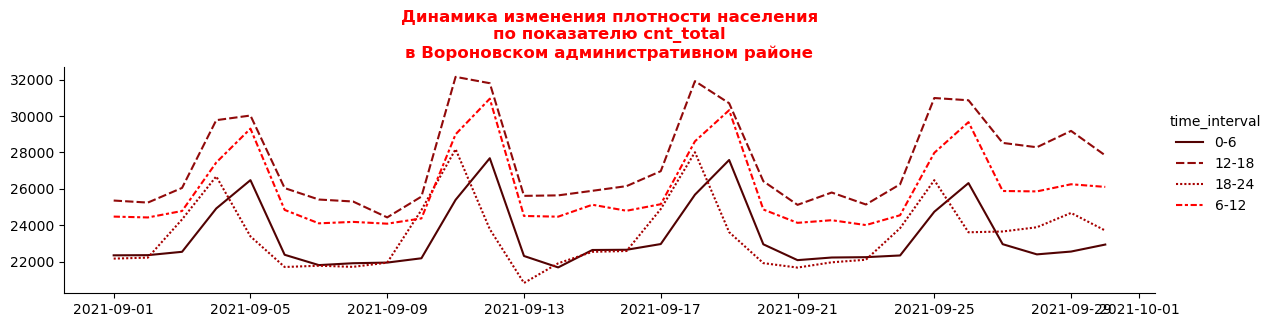

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\799114569.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


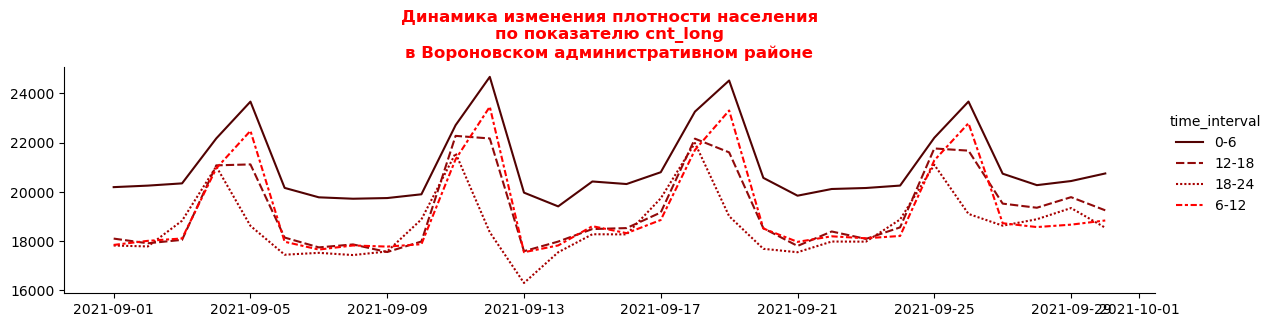

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\799114569.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\799114569.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\799114569.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\799114569.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


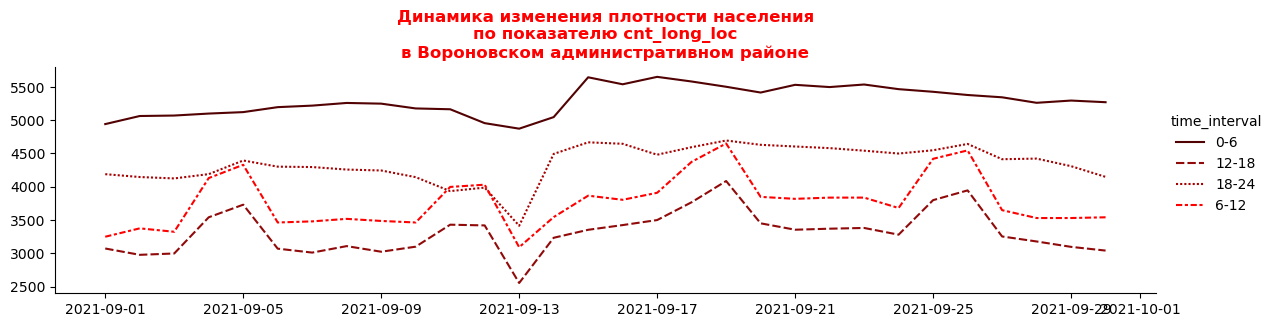

In [53]:
# визуализация изменения плотности населения по дням в рамках временных интервалов
for indicator in indicators:
    sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\
                palette=sns.color_palette(colors), style="time_interval", \
                data = troitsky_okrug_time.loc['Вороновское'], kind="line")
    plt.xticks(rotation=0, ha="center")
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Вороновском административном районе', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

Из визуализации видно, что по всем признакам плотности населения наблюдается корреляция и сезонность.

In [54]:
# вывод данных 
troitsky_okrug_time.head()

cnt_total      cnt_long     cnt_work  \
adm_name    dt         time_interval                                            
Вороновское 2021-09-01 0-6            22344.583333  20191.333333   852.666667   
                       12-18          25353.666667  18102.833333  2056.916667   
                       18-24          22165.041667  17821.583333   998.583333   
                       6-12           24472.000000  17846.375000  1885.583333   
            2021-09-02 0-6            22353.791667  20252.791667   894.500000   

                                          cnt_loc  cnt_long_work  cnt_long_loc  
adm_name    dt         time_interval                                            
Вороновское 2021-09-01 0-6            5298.666667     750.666667   4941.083333  
                       12-18          3742.916667    1536.416667   3072.750000  
                       18-24          4962.041667     798.083333   4188.916667  
                       6-12           3906.583333    1335.666667   3249.583333  
            2021-09-02 0-6            5411.916667     793.750000   5062.416667

In [55]:
# выборка временного ряда
troitsky_okrug_time.loc['Вороновское'].unstack()['cnt_total']['0-6']

dt
2021-09-01    22344.583333
2021-09-02    22353.791667
2021-09-03    22538.166667
2021-09-04    24918.458333
2021-09-05    26473.958333
2021-09-06    22375.083333
2021-09-07    21807.708333
2021-09-08    21910.666667
2021-09-09    21946.333333
2021-09-10    22182.583333
2021-09-11    25393.000000
2021-09-12    27677.750000
2021-09-13    22308.333333
2021-09-14    21681.166667
2021-09-15    22637.583333
2021-09-16    22650.000000
2021-09-17    22964.083333
2021-09-18    25674.958333
2021-09-19    27580.000000
2021-09-20    22950.166667
2021-09-21    22080.291667
2021-09-22    22224.916667
2021-09-23    22243.708333
2021-09-24    22337.000000
2021-09-25    24737.208333
2021-09-26    26311.916667
2021-09-27    22956.708333
2021-09-28    22397.333333
2021-09-29    22551.916667
2021-09-30    22936.291667
Name: 0-6, dtype: float64

In [56]:
# проверка гипотезы на стационарность
p_value = adfuller(troitsky_okrug_time.loc['Вороновское'].unstack()['cnt_total']['0-6'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
      f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!')

Полученный уровень значимости (p-value): 0.0995. 0.0995 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [57]:
# проверка гипотезы на стационарность
p_value = adfuller(troitsky_okrug_time.loc['Вороновское'].unstack()['cnt_total']['12-18'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
      f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!')

Полученный уровень значимости (p-value): 0.8328. 0.8328 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [58]:
#pip install statsmodels

In [59]:
# выборка изменения плотности населения по одному из административному району и показателю
troitsky_okrug_dt.loc['Вороновское'][['cnt_long']]

cnt_long
dt                      
2021-09-01  73962.125000
2021-09-02  73962.125000
2021-09-03  75332.958333
2021-09-04  85224.791667
2021-09-05  85872.541667
2021-09-06  73729.750000
2021-09-07  72706.166667
2021-09-08  72845.250000
2021-09-09  72665.666667
2021-09-10  74643.750000
2021-09-11  87869.250000
2021-09-12  88647.750000
2021-09-13  71411.583333
2021-09-14  72764.041667
2021-09-15  75797.583333
2021-09-16  75443.000000
2021-09-17  78553.333333
2021-09-18  89093.083333
2021-09-19  88433.583333
2021-09-20  75292.750000
2021-09-21  73168.041667
2021-09-22  74686.125000
2021-09-23  74340.625000
2021-09-24  75901.000000
2021-09-25  86329.833333
2021-09-26  87224.458333
2021-09-27  77613.000000
2021-09-28  77086.250000
2021-09-29  78235.208333
2021-09-30  77378.083333

In [60]:
# импорт библиотек для цветовой палитры
from matplotlib.collections import PolyCollection

In [61]:
# визуализация корреляции времянного ряда
fig, ax = plt.subplots(figsize=(8, 3))
my_color="red"
#change the color of the vlines
plot_acf(troitsky_okrug_dt.loc['Вороновское']['cnt_long'].values.squeeze(), \
         lags=15, ax=ax, color=my_color, vlines_kwargs={"colors": my_color})
#get polygon patch collections and change their color
for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

Наблюдается еженедельная корреляция признака изменения плотности населения

In [62]:
# рассчет автокорреляции
corr = acf(troitsky_okrug_dt.loc['Вороновское']['cnt_long'], nlags=15, fft=False)

In [63]:
# количественное значение корреляции
corr[7]

0.756086374863227

In [64]:
# создание признака дня недели
troitsky_okrug['weekday'] = troitsky_okrug['dt'].dt.weekday

In [65]:
# дни недели
troitsky_okrug['weekday'].unique()

array([2, 3, 4, 5, 6, 0, 1], dtype=int64)

In [66]:
# словарь конвертации признака дня недели
data_week = {0 : 'пн', 1 : 'вт', 2 : 'ср', 3 : 'чт', 4 : 'пт', 5 : 'сб', 6 : 'вс'}

In [67]:
# создание признака дня недели
troitsky_okrug['weekday'] = troitsky_okrug['weekday'].map(data_week)

In [68]:
# создание меток оси
dt_weekday = dict(zip(troitsky_okrug[['dt', 'weekday']].drop_duplicates()['dt'].values, \
                      troitsky_okrug[['dt', 'weekday']].drop_duplicates()['weekday'].values))

In [69]:
# метки оси
dt_weekday.values()

dict_values(['ср', 'чт', 'пт', 'сб', 'вс', 'пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс', 'пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс', 'пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс', 'пн', 'вт', 'ср', 'чт'])

In [70]:
dt_weekday.keys()

dict_keys([numpy.datetime64('2021-09-01T00:00:00.000000000'), numpy.datetime64('2021-09-02T00:00:00.000000000'), numpy.datetime64('2021-09-03T00:00:00.000000000'), numpy.datetime64('2021-09-04T00:00:00.000000000'), numpy.datetime64('2021-09-05T00:00:00.000000000'), numpy.datetime64('2021-09-06T00:00:00.000000000'), numpy.datetime64('2021-09-07T00:00:00.000000000'), numpy.datetime64('2021-09-08T00:00:00.000000000'), numpy.datetime64('2021-09-09T00:00:00.000000000'), numpy.datetime64('2021-09-10T00:00:00.000000000'), numpy.datetime64('2021-09-11T00:00:00.000000000'), numpy.datetime64('2021-09-12T00:00:00.000000000'), numpy.datetime64('2021-09-13T00:00:00.000000000'), numpy.datetime64('2021-09-14T00:00:00.000000000'), numpy.datetime64('2021-09-15T00:00:00.000000000'), numpy.datetime64('2021-09-16T00:00:00.000000000'), numpy.datetime64('2021-09-17T00:00:00.000000000'), numpy.datetime64('2021-09-18T00:00:00.000000000'), numpy.datetime64('2021-09-19T00:00:00.000000000'), numpy.datetime64('20

In [71]:
# импорт библиотеке установки меток оси
import matplotlib.ticker as ticker

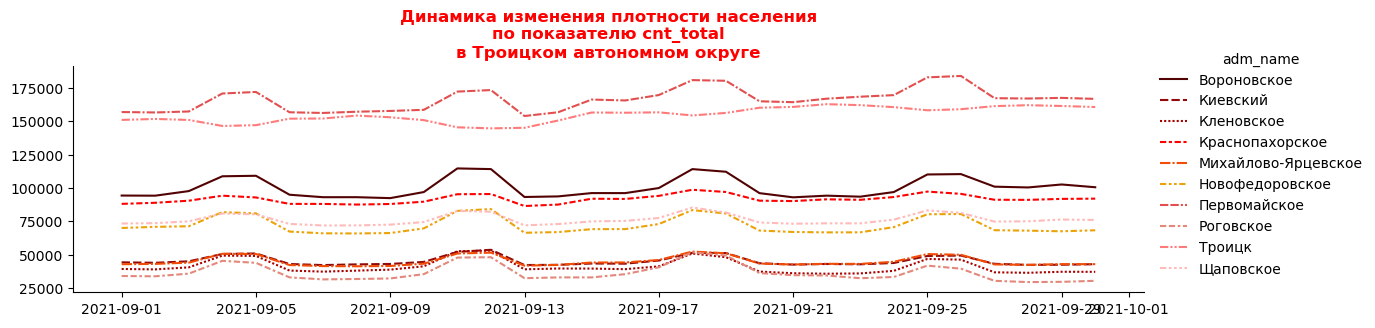

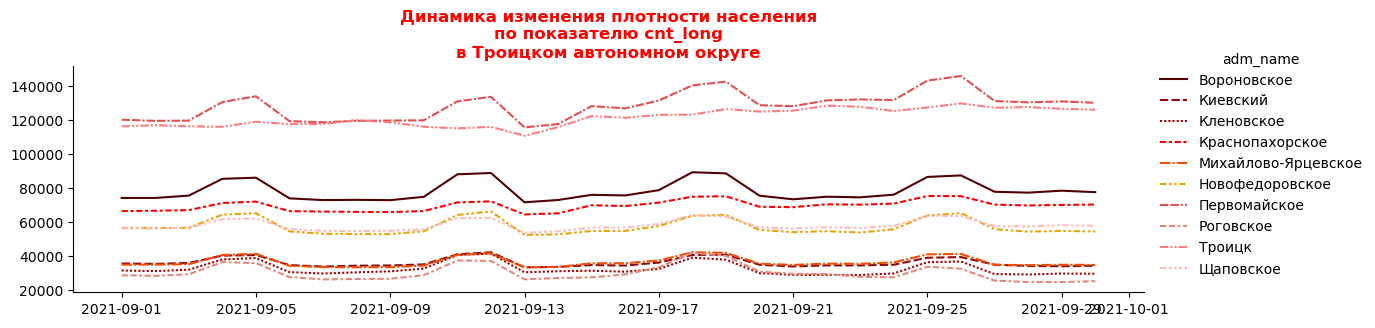

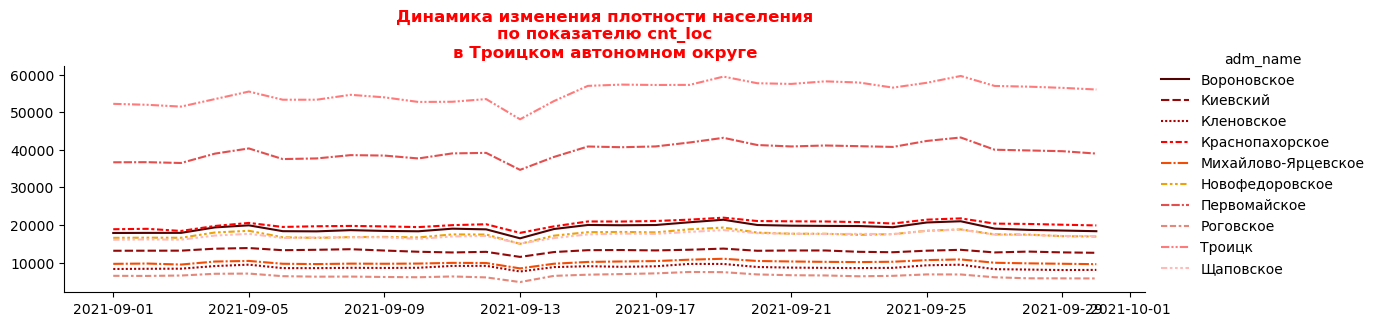

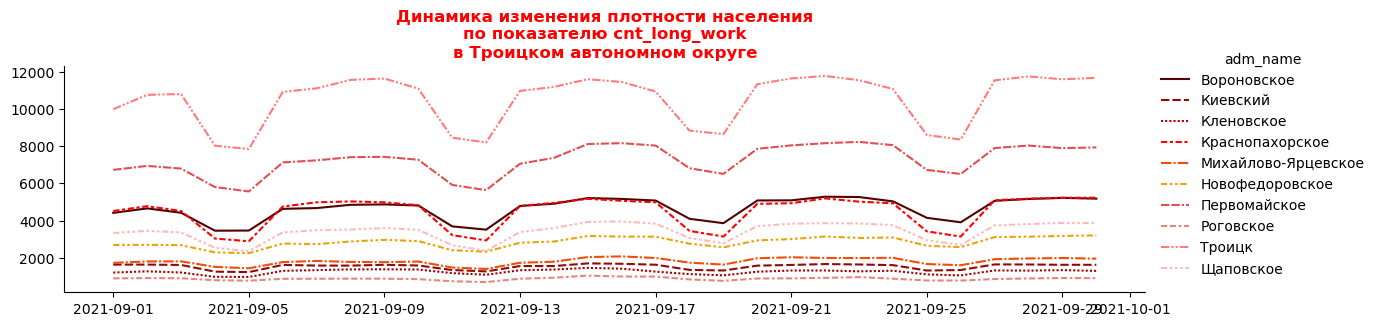

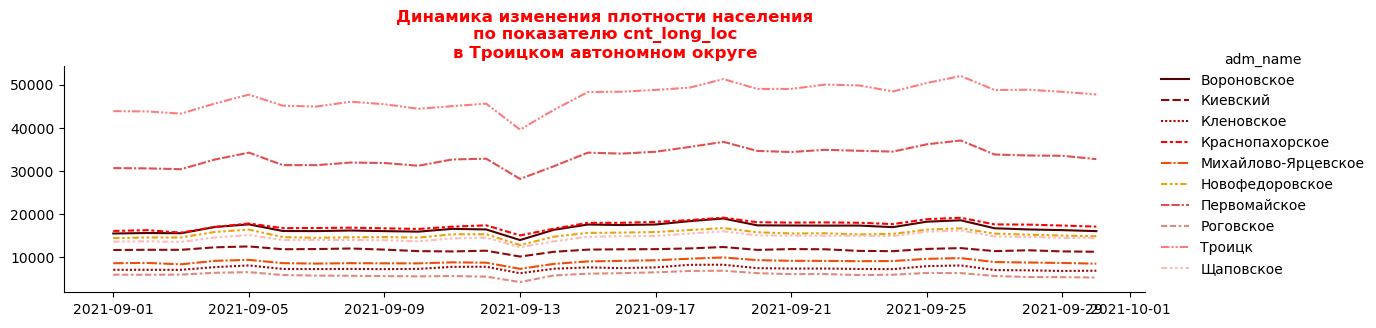

In [72]:
# визуализация изменения плотности населения по дням в по соответствующим районам округа
for indicator in indicators:
    sns.relplot(x = 'dt', y = indicator, hue= 'adm_name', height=3, aspect=4,\
            palette=sns.color_palette(colors), style="adm_name", data = troitsky_okrug_dt, kind="line")
    plt.xticks(rotation=0, ha="center")
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Троицком автономном округе', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

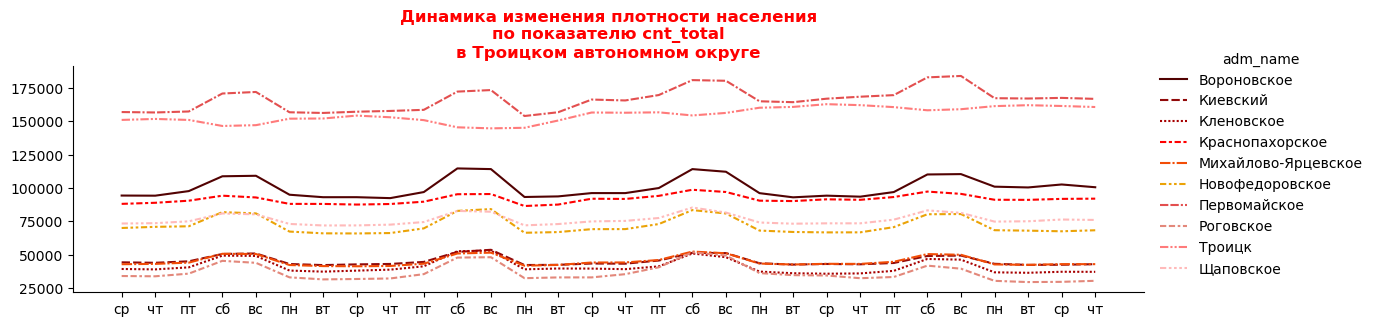

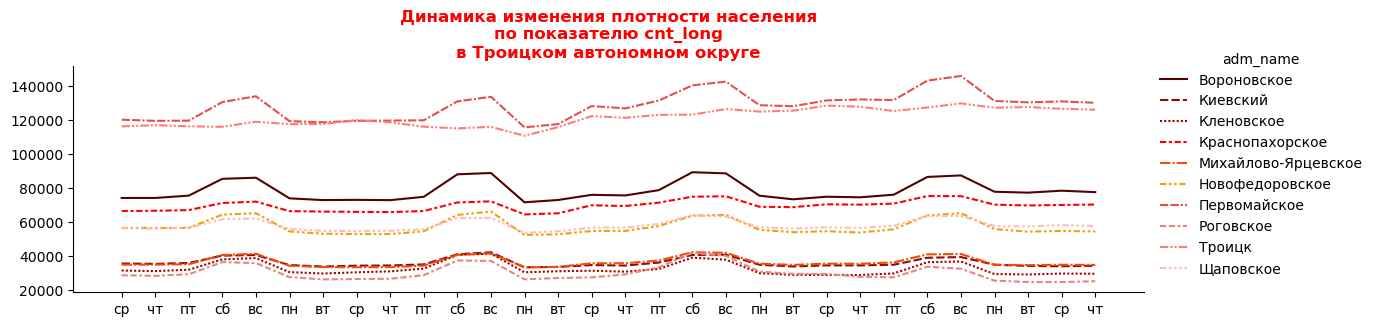

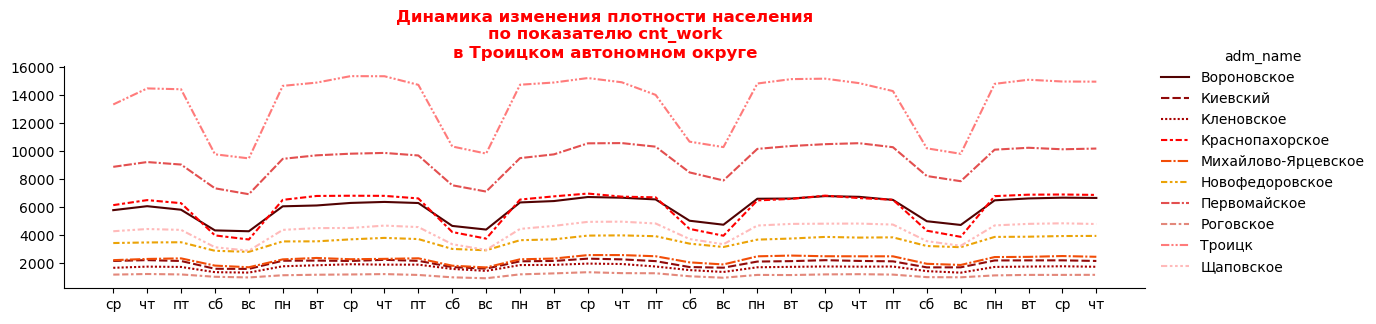

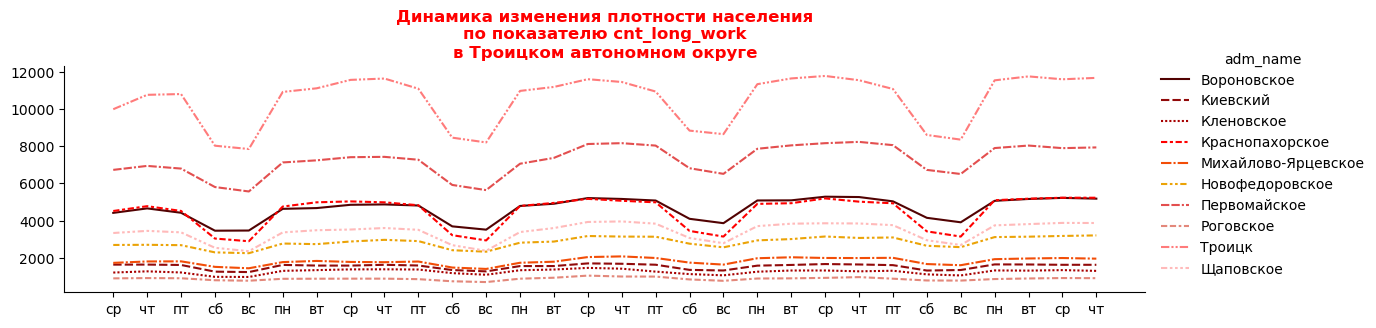

In [73]:
# визуализация изменения плотности населения по дням недели по соответствующим районам округа
for indicator in indicators:
    sns.relplot(x = 'dt', y = indicator, hue= 'adm_name', height=3, aspect=4,\
             palette=sns.color_palette(colors), style="adm_name", data = troitsky_okrug_dt, kind="line")
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.LinearLocator(len(dt_weekday)))
    plt.xticks(list(dt_weekday.keys()), list(dt_weekday.values()))
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Троицком автономном округе', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\3237849423.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


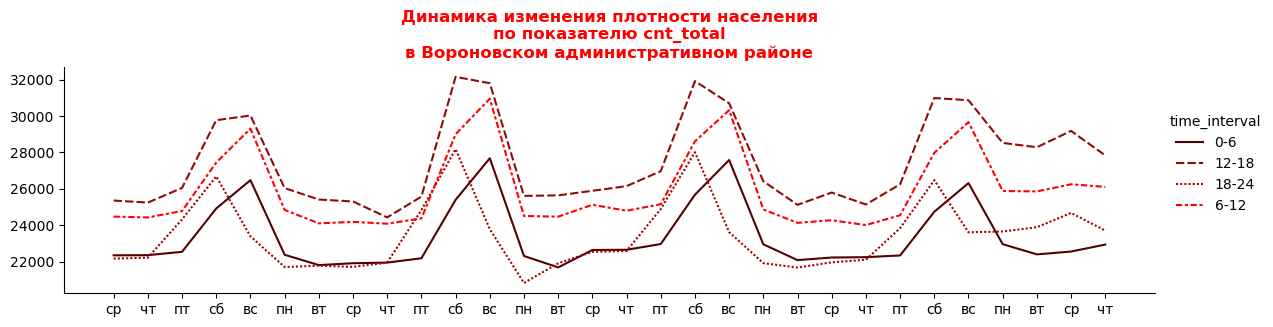

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\3237849423.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


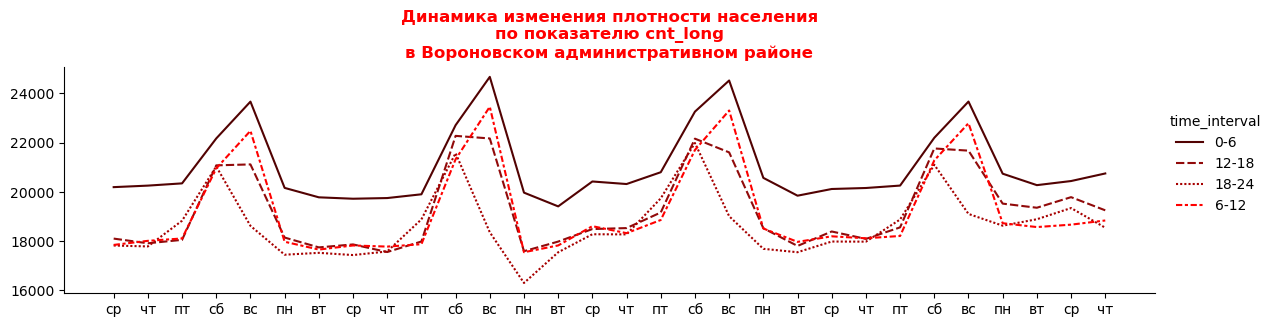

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\3237849423.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


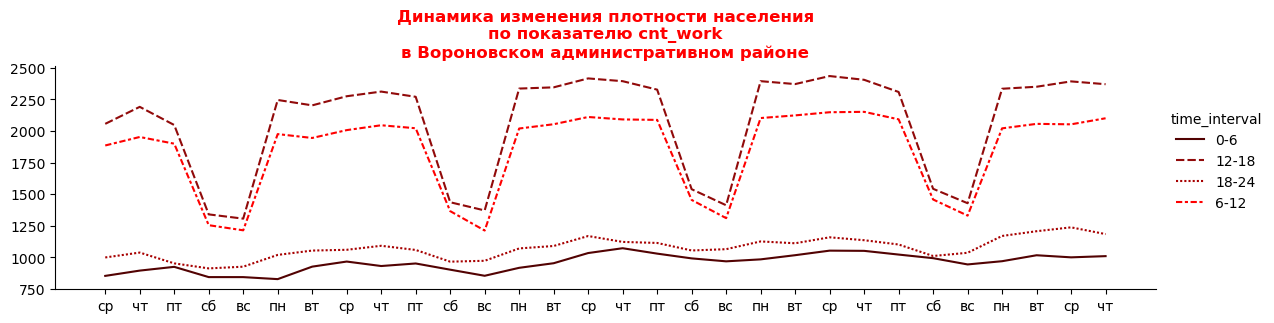

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\3237849423.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


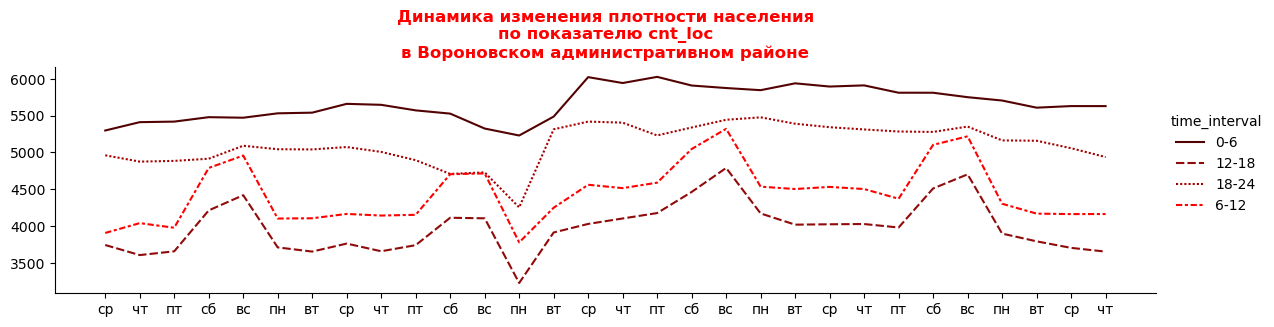

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\3237849423.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


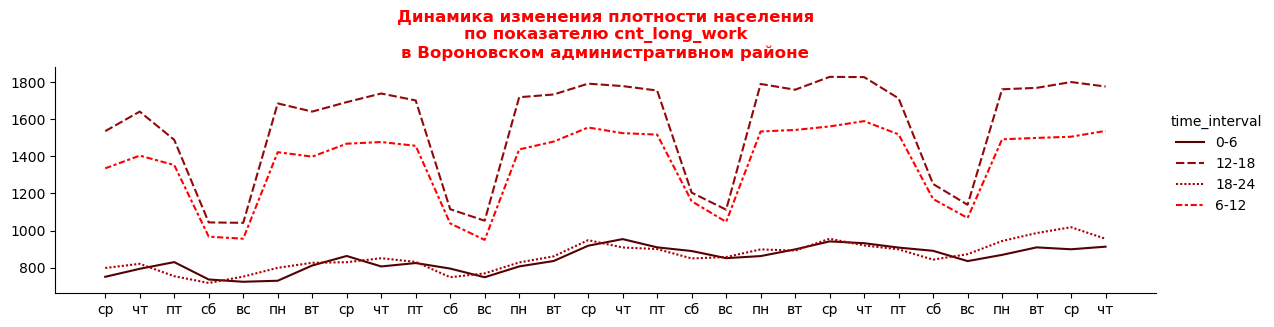

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\3237849423.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


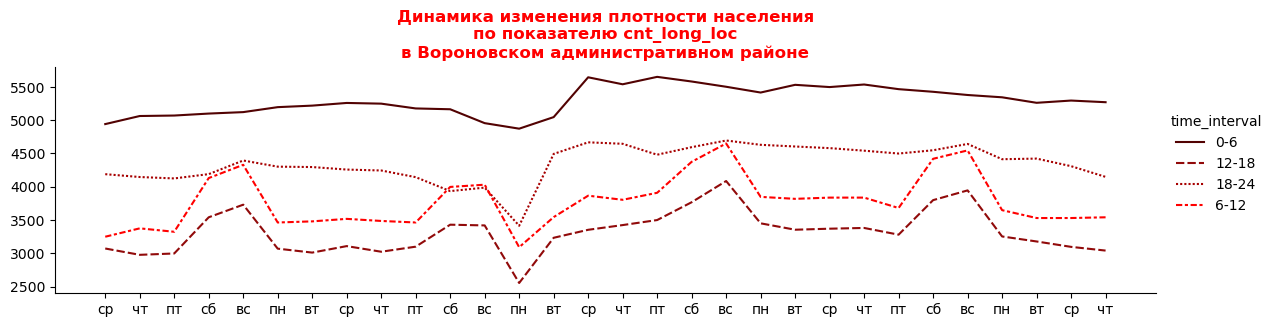

In [74]:
# визуализация изменения плотности населения по дням в рамках временных интервалов
for indicator in indicators:
    sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\
                palette=sns.color_palette(colors), style="time_interval", \
                data = troitsky_okrug_time.loc['Вороновское'], kind="line")
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Вороновском административном районе', \
          c='r', fontweight='bold', fontsize=12)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.LinearLocator(len(dt_weekday)))
    plt.xticks(list(dt_weekday.keys()), list(dt_weekday.values()))
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [75]:
# вывод данных
troitsky_okrug.head()

cnt_total  cnt_long  cnt_work  cnt_loc  cnt_long_work  cnt_long_loc  \
0        1.0       1.0       0.0      0.0            0.0           0.0   
1        2.0       0.0       0.0      0.0            0.0           0.0   
2        1.0       1.0       0.0      0.0            0.0           0.0   
3        1.0       0.0       0.0      0.0            0.0           0.0   
4        1.0       1.0       0.0      0.0            0.0           0.0   

          dt time_interval                                           geometry  \
0 2021-09-01           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
1 2021-09-01          6-12  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
2 2021-09-01         12-18  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
3 2021-09-01         18-24  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
4 2021-09-02           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   

   cell_zid   adm_name                       okrug_name       sub_ter  area  \
0     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
1     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
2     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
3     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
4     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   

   conts_zid weekday  
0          1      ср  
1          1      ср  
2          1      ср  
3          1      ср  
4          1      чт

In [76]:
# расчет суммарной площади по административным районам
adm_name_area = troitsky_okrug.drop_duplicates(subset='cell_zid').groupby('adm_name')['area'].sum().sort_values(ascending=False)
adm_name_area

adm_name
Роговское              189.25
Вороновское            183.25
Новофедоровское        157.00
Первомайское           122.00
Кленовское             116.00
Краснопахорское        107.25
Щаповское               88.00
Михайлово-Ярцевское     69.75
Киевский                56.00
Троицк                  17.25
Name: area, dtype: float64

In [77]:
# расчет средних показателей изменения плотности населения по административным районам
troitsky_okrug_cnt = troitsky_okrug.groupby('adm_name')[indicators].mean()
troitsky_okrug_cnt

cnt_total    cnt_long   cnt_work     cnt_loc  \
adm_name                                                             
Вороновское           27.736459   21.630868   1.647004    5.313107   
Киевский              41.069627   32.636470   1.865561   11.924840   
Кленовское            19.762353   15.550204   0.821993    4.210922   
Краснопахорское       53.459152   40.476313   3.484459   11.808985   
Михайлово-Ярцевское   36.709222   29.639124   1.854655    8.201585   
Новофедоровское       28.013632   22.252018   1.395306    6.817525   
Первомайское          76.401256   58.858123   4.290579   18.167216   
Роговское             12.431152   10.188858   0.393571    2.217737   
Троицк               425.735852  333.316888  37.134638  152.026999   
Щаповское             49.192922   37.350314   2.776340   11.112801   

                     cnt_long_work  cnt_long_loc  
adm_name                                          
Вороновское               1.282872      4.629928  
Киевский                  1.403794     10.575027  
Кленовское                0.607221      3.534993  
Краснопахорское           2.613489     10.120750  
Михайлово-Ярцевское       1.481928      7.234667  
Новофедоровское           1.108985      5.936731  
Первомайское              3.323913     15.218385  
Роговское                 0.300758      1.998276  
Троицк                   28.820116    129.298733  
Щаповское                 2.198784      9.357041

In [78]:
# максимальное значение показателя для визуализации
troitsky_okrug_cnt.max().max()

425.7358516483516

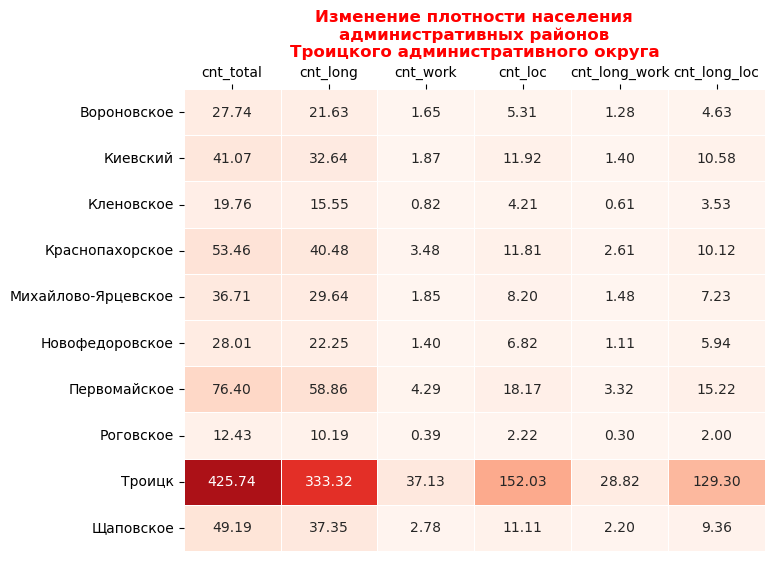

In [79]:
# визуализация рассчитанных показателей изменения плотности по административным районам
f, ax = plt.subplots(figsize=(7.5, 6))
sns.heatmap(troitsky_okrug_cnt, vmin=0, vmax=500, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0, ha="center")
plt.title('Изменение плотности населения\nадминистративных районов\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.yticks()
plt.ylabel('')
plt.show()

In [80]:
# нормирование показателей изменения численности населения с учетом площади административного района
troitsky_okrug_cnt = (troitsky_okrug_cnt.T / adm_name_area).T
troitsky_okrug_cnt

cnt_total   cnt_long  cnt_work   cnt_loc  cnt_long_work  \
adm_name                                                                       
Вороновское           0.151359   0.118040  0.008988  0.028994       0.007001   
Киевский              0.733386   0.582794  0.033314  0.212944       0.025068   
Кленовское            0.170365   0.134053  0.007086  0.036301       0.005235   
Краснопахорское       0.498454   0.377402  0.032489  0.110107       0.024368   
Михайлово-Ярцевское   0.526297   0.424934  0.026590  0.117585       0.021246   
Новофедоровское       0.178431   0.141733  0.008887  0.043424       0.007064   
Первомайское          0.626240   0.482444  0.035169  0.148912       0.027245   
Роговское             0.065686   0.053838  0.002080  0.011719       0.001589   
Троицк               24.680339  19.322718  2.152733  8.813159       1.670731   
Щаповское             0.559010   0.424435  0.031549  0.126282       0.024986   

                     cnt_long_loc  
adm_name                           
Вороновское              0.025266  
Киевский                 0.188840  
Кленовское               0.030474  
Краснопахорское          0.094366  
Михайлово-Ярцевское      0.103723  
Новофедоровское          0.037814  
Первомайское             0.124741  
Роговское                0.010559  
Троицк                   7.495579  
Щаповское                0.106330

In [81]:
# максимальное значение показателя для визуализации
troitsky_okrug_cnt.max().max()

24.6803392259914

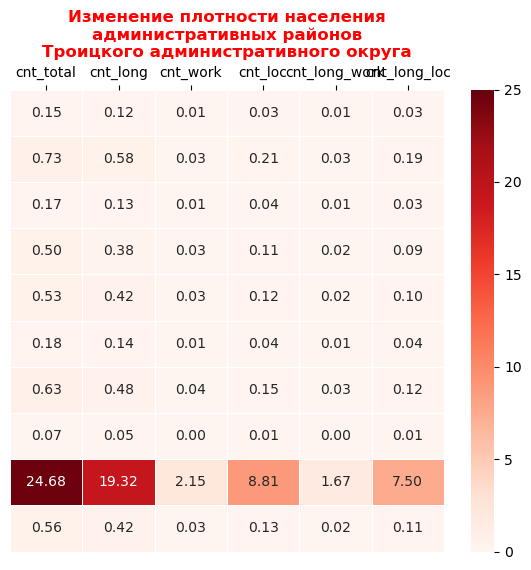

In [82]:
# визуализация рассчитанных показателей изменения численности по административным районам
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(troitsky_okrug_cnt, vmin=0, vmax=25, linewidths=.5, fmt='.2f', annot=True, cmap='Reds')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0, ha="center")
plt.title('Изменение плотности населения\nадминистративных районов\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.yticks([])
plt.show()

In [83]:
# изменчивость данных
troitsky_okrug_cnt.std(axis=1).sort_values().rank(ascending=False)

adm_name
Роговское              10.0
Вороновское             9.0
Кленовское              8.0
Новофедоровское         7.0
Краснопахорское         6.0
Михайлово-Ярцевское     5.0
Щаповское               4.0
Первомайское            3.0
Киевский                2.0
Троицк                  1.0
dtype: float64

### Предлагаемые показатели изменения плотности населения Московской агломерации

In [84]:
# вывод данных
troitsky_okrug.head()

cnt_total  cnt_long  cnt_work  cnt_loc  cnt_long_work  cnt_long_loc  \
0        1.0       1.0       0.0      0.0            0.0           0.0   
1        2.0       0.0       0.0      0.0            0.0           0.0   
2        1.0       1.0       0.0      0.0            0.0           0.0   
3        1.0       0.0       0.0      0.0            0.0           0.0   
4        1.0       1.0       0.0      0.0            0.0           0.0   

          dt time_interval                                           geometry  \
0 2021-09-01           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
1 2021-09-01          6-12  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
2 2021-09-01         12-18  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
3 2021-09-01         18-24  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
4 2021-09-02           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   

   cell_zid   adm_name                       okrug_name       sub_ter  area  \
0     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
1     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
2     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
3     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
4     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   

   conts_zid weekday  
0          1      ср  
1          1      ср  
2          1      ср  
3          1      ср  
4          1      чт

In [85]:
# дни недели
troitsky_okrug['weekday'].unique()

array(['ср', 'чт', 'пт', 'сб', 'вс', 'пн', 'вт'], dtype=object)

In [86]:
# функция конвертации дня недели в рабочий/не рабочий день
def work_day(day):
    
    """
    day: день недели, str
    """
    
    if day in ['сб', 'вс']:
        return 'выходной'
    else:
        return 'рабочий'

In [87]:
# конвертация дня недели
troitsky_okrug['workday'] = troitsky_okrug['weekday'].apply(lambda x: work_day(x))

In [88]:
# показатели изменения плотности населения по дням
troitsky_okrug_workday = troitsky_okrug.groupby(['workday', 'adm_name'], as_index=False)[indicators].mean()
troitsky_okrug_workday

workday             adm_name   cnt_total    cnt_long   cnt_work  \
0   выходной          Вороновское   30.531445   23.863359   1.272138   
1   выходной             Киевский   45.997215   36.369718   1.514704   
2   выходной           Кленовское   23.717062   18.427734   0.686778   
3   выходной      Краснопахорское   55.845284   42.677634   2.355596   
4   выходной  Михайлово-Ярцевское   41.403895   33.472526   1.520589   
5   выходной      Новофедоровское   31.747366   24.980431   1.194264   
6   выходной         Первомайское   81.329827   63.086514   3.524582   
7   выходной            Роговское   15.308832   12.236964   0.335423   
8   выходной               Троицк  416.449691  333.604081  27.614440   
9   выходной            Щаповское   52.977312   40.377750   2.118880   
10   рабочий          Вороновское   26.703026   20.805415   1.785609   
11   рабочий             Киевский   39.265669   31.269752   1.994007   
12   рабочий           Кленовское   18.322691   14.502675   0.871217   
13   рабочий      Краснопахорское   52.590697   39.675122   3.895319   
14   рабочий  Михайлово-Ярцевское   34.999078   28.242718   1.976347   
15   рабочий      Новофедоровское   26.647770   21.253920   1.468850   
16   рабочий         Первомайское   74.608403   57.319972   4.569224   
17   рабочий            Роговское   11.357822    9.424946   0.415260   
18   рабочий               Троицк  429.112637  333.212454  40.596528   
19   рабочий            Щаповское   47.815681   36.248549   3.015607   

       cnt_loc  cnt_long_work  cnt_long_loc  
0     5.505322       1.031302      4.829781  
1    12.094246       1.187937     10.805468  
2     4.506844       0.518946      3.808928  
3    12.186000       1.842404     10.540037  
4     8.567728       1.278657      7.607609  
5     7.135033       0.964459      6.239410  
6    18.839908       2.838940     15.922285  
7     2.314569       0.261109      2.088072  
8   154.363839      22.992531    132.784598  
9    11.535963       1.732690      9.817494  
10    5.242036       1.375889      4.556034  
11   11.862822       1.482817     10.490665  
12    4.103195       0.639357      3.435271  
13   11.671767       2.894132      9.968146  
14    8.068209       1.555975      7.098814  
15    6.701376       1.161855      5.826006  
16   17.922512       3.500330     14.962329  
17    2.181620       0.315546      1.964783  
18  151.177239      30.939238    128.031146  
19   10.958801       2.368408      9.189470

In [89]:
# показатели изменения плотности населения по рабочим дням
is_workday = troitsky_okrug_workday.query('workday == "рабочий"').drop(columns='workday').set_index('adm_name')

In [90]:
# вывод данных
is_workday.head()

cnt_total   cnt_long  cnt_work    cnt_loc  cnt_long_work  \
adm_name                                                                        
Вороновское          26.703026  20.805415  1.785609   5.242036       1.375889   
Киевский             39.265669  31.269752  1.994007  11.862822       1.482817   
Кленовское           18.322691  14.502675  0.871217   4.103195       0.639357   
Краснопахорское      52.590697  39.675122  3.895319  11.671767       2.894132   
Михайлово-Ярцевское  34.999078  28.242718  1.976347   8.068209       1.555975   

                     cnt_long_loc  
adm_name                           
Вороновское              4.556034  
Киевский                10.490665  
Кленовское               3.435271  
Краснопахорское          9.968146  
Михайлово-Ярцевское      7.098814

In [91]:
# показатели изменения плотности населения по не рабочим дням
no_workday = troitsky_okrug_workday.query('workday == "выходной"').drop(columns='workday').set_index('adm_name')

In [92]:
# вывод данных
no_workday.head()

cnt_total   cnt_long  cnt_work    cnt_loc  cnt_long_work  \
adm_name                                                                        
Вороновское          30.531445  23.863359  1.272138   5.505322       1.031302   
Киевский             45.997215  36.369718  1.514704  12.094246       1.187937   
Кленовское           23.717062  18.427734  0.686778   4.506844       0.518946   
Краснопахорское      55.845284  42.677634  2.355596  12.186000       1.842404   
Михайлово-Ярцевское  41.403895  33.472526  1.520589   8.567728       1.278657   

                     cnt_long_loc  
adm_name                           
Вороновское              4.829781  
Киевский                10.805468  
Кленовское               3.808928  
Краснопахорское         10.540037  
Михайлово-Ярцевское      7.607609

In [93]:
# отношение изменение плотности населения
is_workday / no_workday

cnt_total  cnt_long  cnt_work   cnt_loc  cnt_long_work  \
adm_name                                                                      
Вороновское           0.874607  0.871856  1.403629  0.952176       1.334127   
Киевский              0.853653  0.859774  1.316433  0.980865       1.248229   
Кленовское            0.772553  0.787003  1.268557  0.910436       1.232029   
Краснопахорское       0.941721  0.929647  1.653644  0.957801       1.570846   
Михайлово-Ярцевское   0.845309  0.843758  1.299724  0.941698       1.216882   
Новофедоровское       0.839370  0.850823  1.229921  0.939221       1.204671   
Первомайское          0.917356  0.908593  1.296388  0.951306       1.232971   
Роговское             0.741913  0.770203  1.238018  0.942560       1.208487   
Троицк                1.030407  0.998826  1.470120  0.979357       1.345621   
Щаповское             0.902569  0.897736  1.423208  0.949969       1.366897   

                     cnt_long_loc  
adm_name                           
Вороновское              0.943321  
Киевский                 0.970866  
Кленовское               0.901900  
Краснопахорское          0.945741  
Михайлово-Ярцевское      0.933120  
Новофедоровское          0.933743  
Первомайское             0.939710  
Роговское                0.940955  
Троицк                   0.964202  
Щаповское                0.936030

In [94]:
# расчет рейтинга
troitsky_okrug_workday_rating = (is_workday / no_workday).mean(axis=1).sort_values(ascending=False).rank(ascending=True)
troitsky_okrug_workday_rating

adm_name
Краснопахорское        10.0
Троицк                  9.0
Щаповское               8.0
Вороновское             7.0
Первомайское            6.0
Киевский                5.0
Михайлово-Ярцевское     4.0
Новофедоровское         3.0
Кленовское              2.0
Роговское               1.0
dtype: float64

Интерпритация рейтинга
* чем больше плотность населения в рабочие дни по сравнению с выходными днями тем привлекательней район

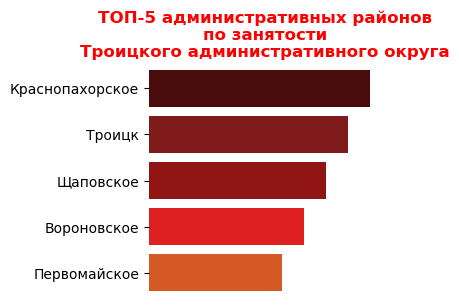

In [96]:
# визуализация антирейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = troitsky_okrug_workday_rating.values[:5], y = troitsky_okrug_workday_rating.index[:5], \
            palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо занятости\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [97]:
# расчет рейтинга
troitsky_okrug_workday_rating = (is_workday / no_workday).mean(axis=1).sort_values(ascending=True).rank(ascending=False)
troitsky_okrug_workday_rating

adm_name
Роговское              10.0
Кленовское              9.0
Новофедоровское         8.0
Михайлово-Ярцевское     7.0
Киевский                6.0
Первомайское            5.0
Вороновское             4.0
Щаповское               3.0
Троицк                  2.0
Краснопахорское         1.0
dtype: float64

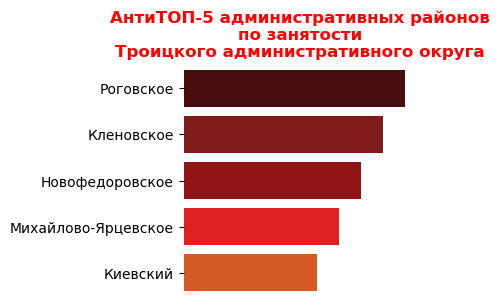

In [98]:
# визуализация антирейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = troitsky_okrug_workday_rating.values[:5], y = troitsky_okrug_workday_rating.index[:5], \
            palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо занятости\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

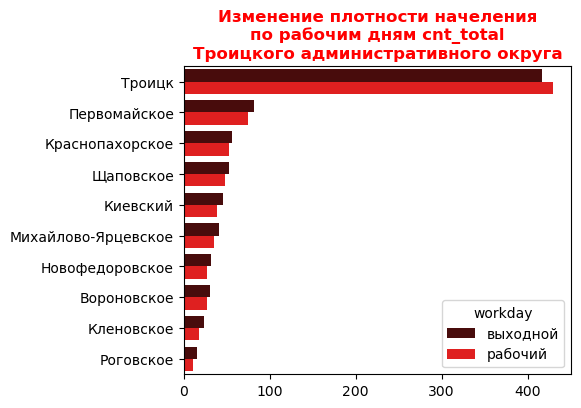

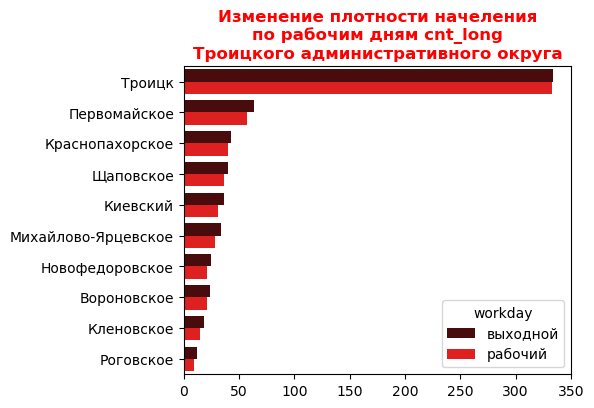

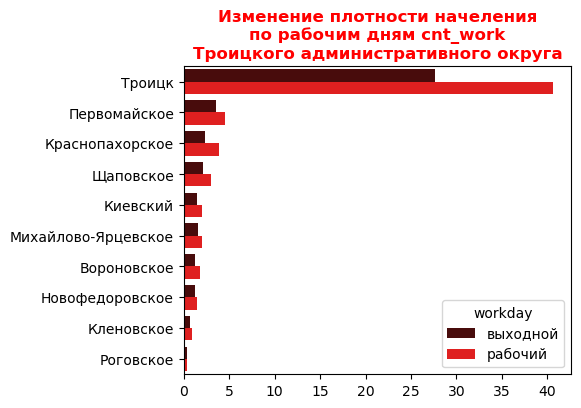

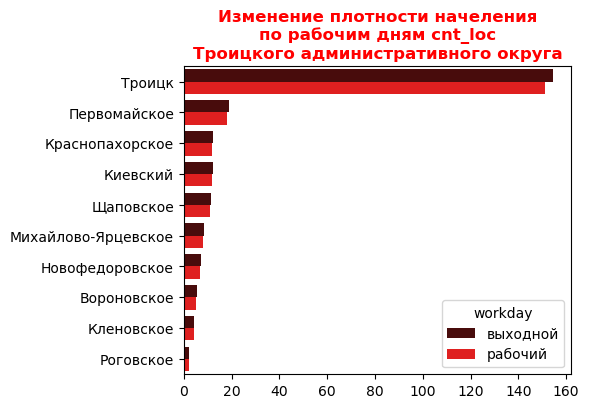

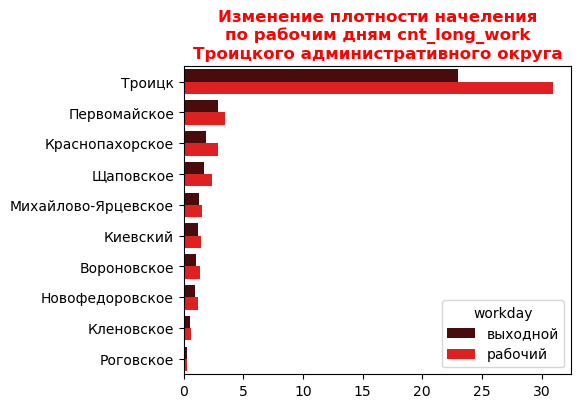

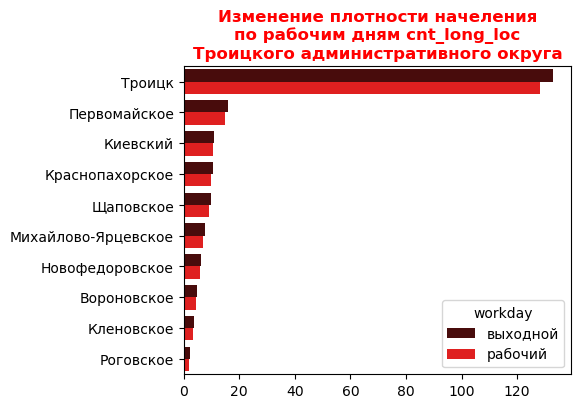

In [99]:
# визуализация показателей изменения плотности населения по рабочим дням
for indicator in indicators:
    plt.figure(figsize=(5,4))
    sns.barplot(x=indicator, y='adm_name', hue='workday', data=troitsky_okrug_workday, \
                order=troitsky_okrug_workday[['adm_name', indicator]].sort_values(by=indicator, ascending=False) \
                .drop_duplicates(subset='adm_name')['adm_name'].values, \
                palette=sns.color_palette([colors[0], colors[3]]))
    plt.title(f'Изменение плотности начеления\nпо рабочим дням {indicator}\nТроицкого административного округа', \
              c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [100]:
# изменение плотности населения по временным интервалам
troitsky_okrug_workday_time_interval = troitsky_okrug.groupby(['workday', 'adm_name', 'time_interval'], \
                                                              as_index=False)[indicators].mean()
troitsky_okrug_workday_time_interval.head()

workday     adm_name time_interval  cnt_total   cnt_long  cnt_work  \
0  выходной  Вороновское           0-6  28.555225  25.554917  1.003511   
1  выходной  Вороновское         12-18  33.845601  23.703816  1.551116   
2  выходной  Вороновское         18-24  27.892964  22.011997  1.086927   
3  выходной  Вороновское          6-12  31.815976  24.180546  1.445505   
4  выходной     Киевский           0-6  45.910114  40.447281  1.349187   

     cnt_loc  cnt_long_work  cnt_long_loc  
0   6.176127       0.884979      5.775680  
1   4.816316       1.222124      4.052946  
2   5.594149       0.877430      4.789990  
3   5.437042       1.139658      4.703156  
4  13.253954       1.140646     12.487912

In [101]:
# выборка данных по одному из административных районов
voronovsky_workday_time_interval = troitsky_okrug_workday_time_interval[troitsky_okrug_workday_time_interval['adm_name'] == 'Вороновское']
voronovsky_workday_time_interval.head()

workday     adm_name time_interval  cnt_total   cnt_long  cnt_work  \
0   выходной  Вороновское           0-6  28.555225  25.554917  1.003511   
1   выходной  Вороновское         12-18  33.845601  23.703816  1.551116   
2   выходной  Вороновское         18-24  27.892964  22.011997  1.086927   
3   выходной  Вороновское          6-12  31.815976  24.180546  1.445505   
40   рабочий  Вороновское           0-6  25.179157  22.712356  1.094072   

     cnt_loc  cnt_long_work  cnt_long_loc  
0   6.176127       0.884979      5.775680  
1   4.816316       1.222124      4.052946  
2   5.594149       0.877430      4.789990  
3   5.437042       1.139658      4.703156  
40  6.380819       0.969914      5.959324

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\1743233164.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(x = 'time_interval', y = indicator, hue= 'workday', height=3, aspect=4,\


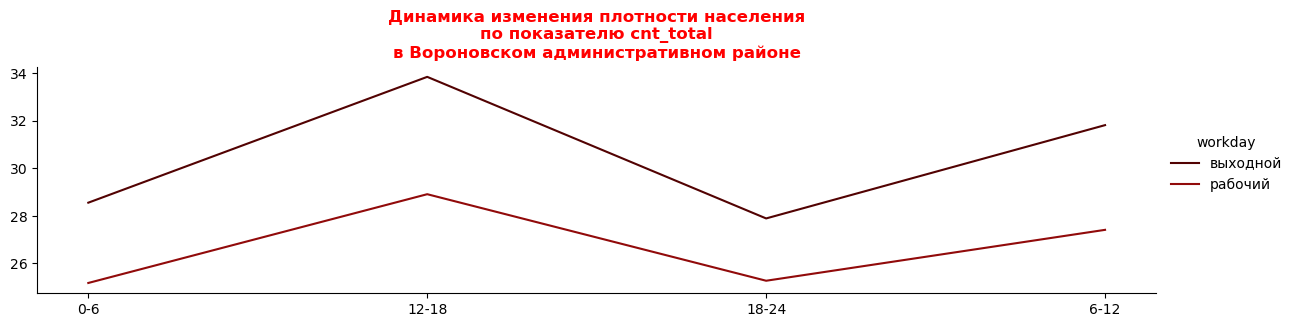

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\1743233164.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(x = 'time_interval', y = indicator, hue= 'workday', height=3, aspect=4,\


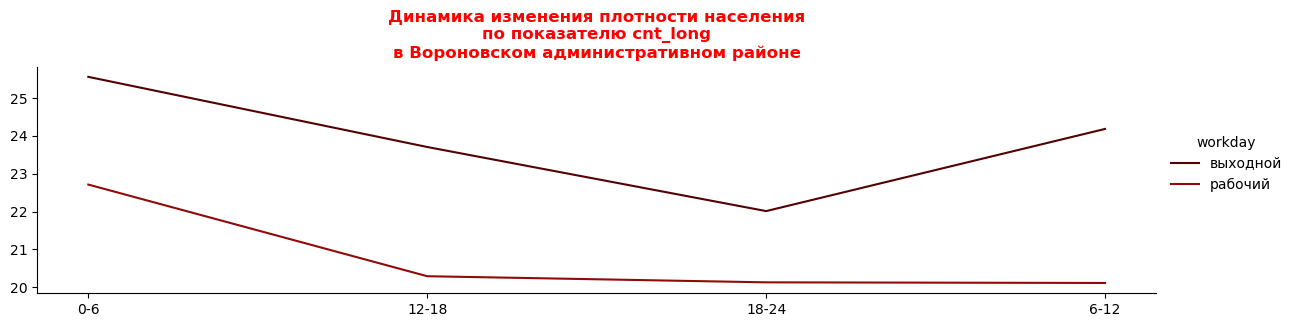

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\1743233164.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(x = 'time_interval', y = indicator, hue= 'workday', height=3, aspect=4,\


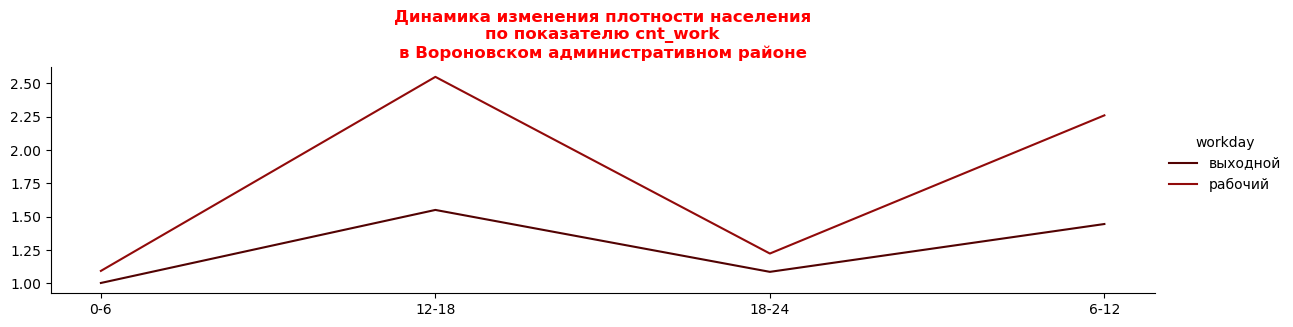

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\1743233164.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(x = 'time_interval', y = indicator, hue= 'workday', height=3, aspect=4,\


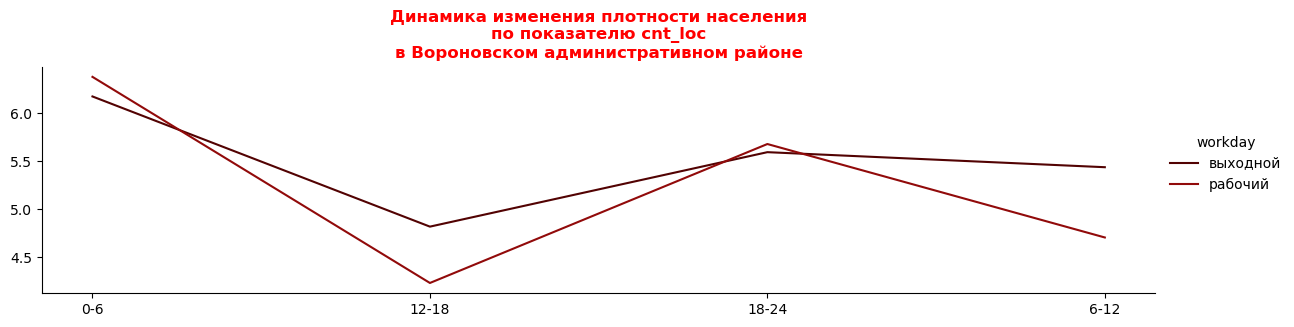

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\1743233164.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(x = 'time_interval', y = indicator, hue= 'workday', height=3, aspect=4,\


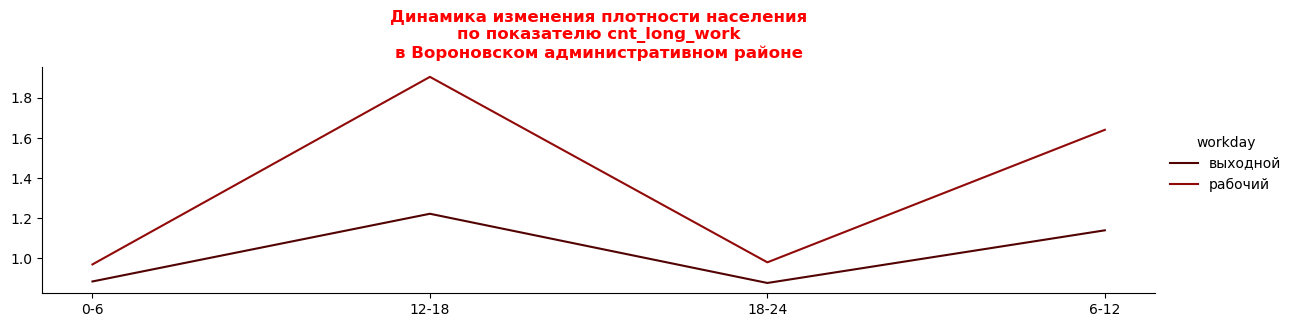

C:\Users\rus_k\AppData\Local\Temp\ipykernel_9588\1743233164.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(x = 'time_interval', y = indicator, hue= 'workday', height=3, aspect=4,\


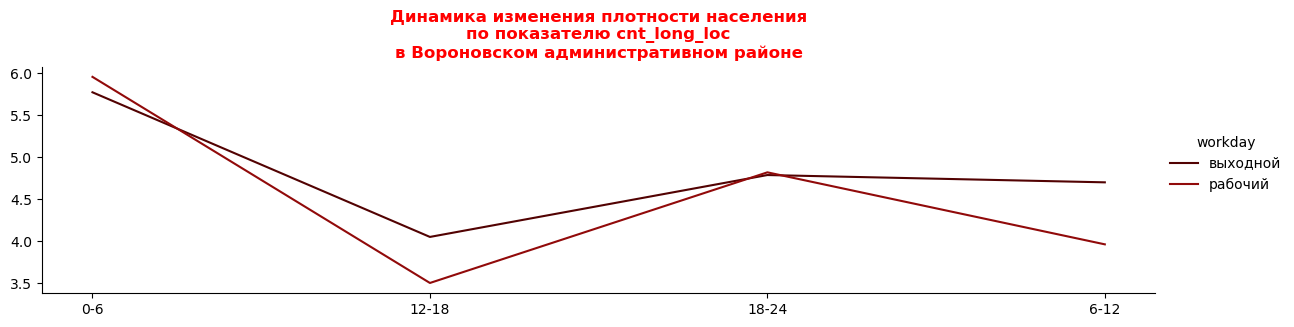

In [102]:
# визуализация изменения плотности населения по дням в рамках временных интервалов
for indicator in indicators:
    sns.relplot(x = 'time_interval', y = indicator, hue= 'workday', height=3, aspect=4,\
                palette=sns.color_palette(colors),  \
                data = voronovsky_workday_time_interval, kind="line")
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Вороновском административном районе', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [103]:
# вывод данных
troitsky_okrug.head()

cnt_total  cnt_long  cnt_work  cnt_loc  cnt_long_work  cnt_long_loc  \
0        1.0       1.0       0.0      0.0            0.0           0.0   
1        2.0       0.0       0.0      0.0            0.0           0.0   
2        1.0       1.0       0.0      0.0            0.0           0.0   
3        1.0       0.0       0.0      0.0            0.0           0.0   
4        1.0       1.0       0.0      0.0            0.0           0.0   

          dt time_interval                                           geometry  \
0 2021-09-01           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
1 2021-09-01          6-12  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
2 2021-09-01         12-18  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
3 2021-09-01         18-24  MULTIPOLYGON (((37.0381820225216 55.1447963241...   
4 2021-09-02           0-6  MULTIPOLYGON (((37.0381820225216 55.1447963241...   

   cell_zid   adm_name                       okrug_name       sub_ter  area  \
0     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
1     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
2     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
3     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   
4     32909  Роговское  Троицкий административный округ  Новая Москва  0.25   

   conts_zid weekday  workday  
0          1      ср  рабочий  
1          1      ср  рабочий  
2          1      ср  рабочий  
3          1      ср  рабочий  
4          1      чт  рабочий

In [104]:
# расчет показателей в целом по административному району
troitsky_okrug_time_interval =  troitsky_okrug.groupby(['adm_name', 'dt', 'time_interval'], as_index=False)[indicators].mean()
troitsky_okrug_time_interval.head()

adm_name         dt time_interval  cnt_total   cnt_long  cnt_work  \
0  Вороновское 2021-09-01           0-6  24.938151  22.534970  0.951637   
1  Вороновское 2021-09-01         12-18  27.953326  19.959022  2.267824   
2  Вороновское 2021-09-01         18-24  24.491759  19.692357  1.103407   
3  Вороновское 2021-09-01          6-12  26.921892  19.632976  2.074349   
4  Вороновское 2021-09-02           0-6  24.976304  22.628818  0.999441   

    cnt_loc  cnt_long_work  cnt_long_loc  
0  5.913690       0.837798      5.514602  
1  4.126700       1.693954      3.387817  
2  5.482919       0.881860      4.628637  
3  4.297671       1.469380      3.574899  
4  6.046834       0.886872      5.656331

In [105]:
# административные районы
troitsky_okrug_time_interval['adm_name'].unique()

array(['Вороновское', 'Киевский', 'Кленовское', 'Краснопахорское',
       'Михайлово-Ярцевское', 'Новофедоровское', 'Первомайское',
       'Роговское', 'Троицк', 'Щаповское'], dtype=object)

In [106]:
# временные интервалы
troitsky_okrug_time_interval['time_interval'].unique()

array(['0-6', '12-18', '18-24', '6-12'], dtype=object)

In [107]:
# показатели изменения плотности населения
indicators

Index(['cnt_total', 'cnt_long', 'cnt_work', 'cnt_loc', 'cnt_long_work',
       'cnt_long_loc'],
      dtype='object')

In [108]:
# расчет стационарности временного ряда (степень изменчивости)
adm_name = []
time_interval = []
indicators_list = []
adfuller_list = []
for name in troitsky_okrug_time_interval['adm_name'].unique():
    for interval in troitsky_okrug_time_interval['time_interval'].unique():
        for indicator in indicators:
            p_adfuller = adfuller(troitsky_okrug_time_interval[(troitsky_okrug_time_interval['adm_name'] == name) \
                             & (troitsky_okrug_time_interval['time_interval'] == interval)][indicator])[1]
            adm_name.append(name)
            time_interval.append(interval)
            indicators_list.append(indicator)
            adfuller_list.append(p_adfuller)

In [109]:
# создание DataFrame с расчитаными показателями изменчивости данных
troitsky_okrug_adfuller = pd.DataFrame([adm_name, time_interval, indicators_list, adfuller_list], \
                                        index=['adm_name', 'time_interval', 'indicator', 'adfuller']).T
troitsky_okrug_adfuller.head()

adm_name time_interval      indicator  adfuller
0  Вороновское           0-6      cnt_total  0.479634
1  Вороновское           0-6       cnt_long  0.633381
2  Вороновское           0-6       cnt_work  0.522785
3  Вороновское           0-6        cnt_loc  0.362399
4  Вороновское           0-6  cnt_long_work   0.31528

In [110]:
# преобразование DataFrame для удобства анализа и интерпритации рейтинга
troitsky_okrug_adfuller = pd.pivot_table(troitsky_okrug_adfuller, values='adfuller', \
                                         index=['adm_name', 'time_interval'], columns='indicator')
troitsky_okrug_adfuller.head()

indicator                   cnt_loc  cnt_long  cnt_long_loc  cnt_long_work  \
adm_name    time_interval                                                    
Вороновское 0-6            0.362399  0.633381      0.137764       0.315280   
            12-18          0.022024  0.980696      0.015311       0.276280   
            18-24          0.132911  0.914831      0.102851       0.859420   
            6-12           0.512655  0.859385      0.505029       0.735790   
Киевский    0-6            0.014400  0.268904      0.008463       0.010342   

indicator                  cnt_total  cnt_work  
adm_name    time_interval                       
Вороновское 0-6             0.479634  0.522785  
            12-18           0.934566  0.357148  
            18-24           0.863611  0.524393  
            6-12            0.707346  0.673275  
Киевский    0-6             0.580648  0.000228

In [111]:
# упорядочивавние признаков
troitsky_okrug_adfuller = troitsky_okrug_adfuller[['cnt_total', 'cnt_long', 'cnt_work', 'cnt_long_work', 'cnt_loc', 'cnt_long_loc']]

In [112]:
# преобразование индекса в признак
troitsky_okrug_adfuller = troitsky_okrug_adfuller.reset_index()

In [113]:
# подсчет рейтинга
troitsky_okrug_adfuller_rating = troitsky_okrug_adfuller.groupby('adm_name') \
                      [['cnt_total', 'cnt_long', 'cnt_work', 'cnt_long_work', 'cnt_loc', 'cnt_long_loc']].mean()

In [114]:
troitsky_okrug_adfuller_rating

indicator            cnt_total  cnt_long  cnt_work  cnt_long_work   cnt_loc  \
adm_name                                                                      
Вороновское           0.746289  0.847073  0.519401       0.546692  0.257497   
Киевский              0.524770  0.536975  0.173161       0.545682  0.012027   
Кленовское            0.500859  0.592566  0.188931       0.246356  0.378883   
Краснопахорское       0.733211  0.720759  0.607484       0.911485  0.233113   
Михайлово-Ярцевское   0.164259  0.371834  0.418030       0.522382  0.175961   
Новофедоровское       0.314941  0.680977  0.465597       0.651159  0.159718   
Первомайское          0.721324  0.658072  0.562752       0.540369  0.369785   
Роговское             0.236343  0.105781  0.470128       0.467214  0.114002   
Троицк                0.552664  0.592823  0.217648       0.298467  0.228462   
Щаповское             0.588277  0.888025  0.523200       0.572169  0.203071   

indicator            cnt_long_loc  
adm_name                           
Вороновское              0.190239  
Киевский                 0.015224  
Кленовское               0.312005  
Краснопахорское          0.224964  
Михайлово-Ярцевское      0.204662  
Новофедоровское          0.192012  
Первомайское             0.427189  
Роговское                0.095031  
Троицк                   0.316923  
Щаповское                0.198313

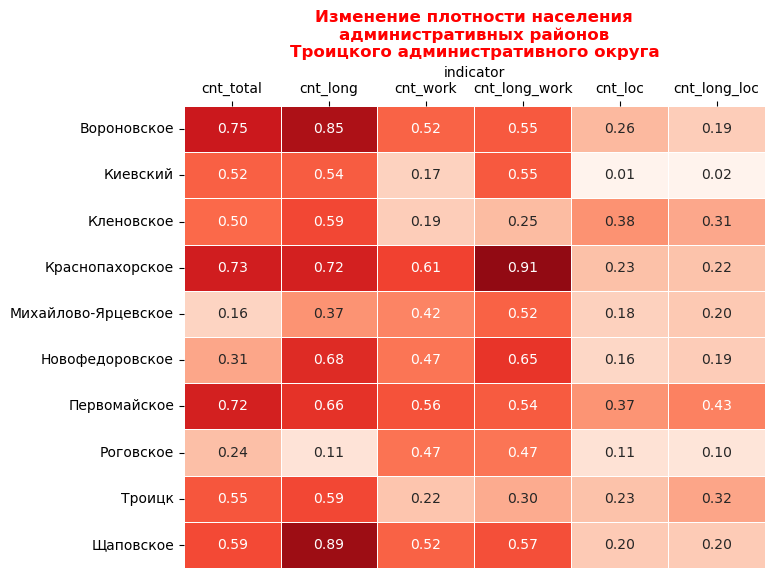

In [115]:
# визуализация рассчитанных показателей изменения плотности по административным районам
f, ax = plt.subplots(figsize=(7.5, 6))
sns.heatmap(troitsky_okrug_adfuller_rating, vmin=0, vmax=1, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0, ha="center")
plt.title('Изменение плотности населения\nадминистративных районов\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.yticks()
plt.ylabel('')
plt.show()

In [116]:
# рейтинг административных районов по динамике изменения плотности численности населения
troitsky_okrug_rating = troitsky_okrug_adfuller_rating.mean(axis=1).sort_values(ascending=True).rank(ascending=False)
troitsky_okrug_rating

adm_name
Роговское              10.0
Киевский                9.0
Михайлово-Ярцевское     8.0
Троицк                  7.0
Кленовское              6.0
Новофедоровское         5.0
Щаповское               4.0
Вороновское             3.0
Первомайское            2.0
Краснопахорское         1.0
dtype: float64

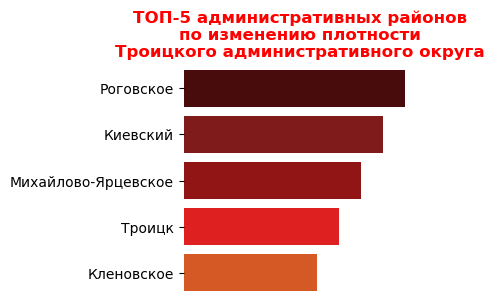

In [117]:
# визуализация рейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = troitsky_okrug_rating.values[:5], y = troitsky_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо изменению плотности\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [118]:
# антирейтинг административных районов по динамике изменения плотности численности населения
troitsky_okrug_rating = troitsky_okrug_adfuller_rating.mean(axis=1).sort_values(ascending=False).rank(ascending=True)
troitsky_okrug_rating

adm_name
Краснопахорское        10.0
Первомайское            9.0
Вороновское             8.0
Щаповское               7.0
Новофедоровское         6.0
Кленовское              5.0
Троицк                  4.0
Михайлово-Ярцевское     3.0
Киевский                2.0
Роговское               1.0
dtype: float64

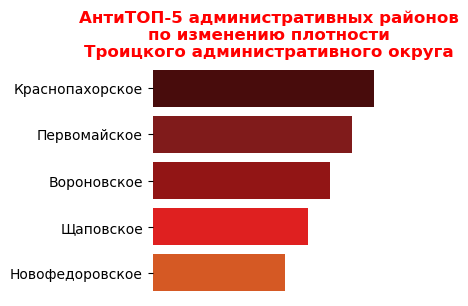

In [119]:
# визуализация рейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = troitsky_okrug_rating.values[:5], y = troitsky_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо изменению плотности\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()